In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
import numpy as np

<span style="font-family:Cambria; color:#0261ab; font-size: 30px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 1 Data Wrangling </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.1 Inquire structural integrity </span>

In [2]:
path = '../dataset/raw/ghi_data.xlsx'
df_ghi = pd.read_excel(path, index_col=False)


In [3]:
df_ghi.reset_index(drop=True, inplace=True)
df_ghi.head(25)


Date (MM/DD/YYYY)         Time (HH:MM)  GHI (W/m^2)  HOUR  ETR (W/m^2)  \
0         2005-12-31             01:00:00            0     1            0   
1         2005-12-31             02:00:00            0     2            0   
2         2005-12-31             03:00:00            0     3            0   
3         2005-12-31             04:00:00            0     4            0   
4         2005-12-31             05:00:00            0     5            0   
5         2005-12-31             06:00:00            0     6            0   
6         2005-12-31             07:00:00            0     7            0   
7         2005-12-31             08:00:00            8     8           54   
8         2005-12-31             09:00:00          171     9          266   
9         2005-12-31             10:00:00          228    10          454   
10        2005-12-31             11:00:00          417    11          589   
11        2005-12-31             12:00:00          467    12          660   
12        2005-12-31             13:00:00          475    13          664   
13        2005-12-31             14:00:00          223    14          598   
14        2005-12-31             15:00:00          307    15          469   
15        2005-12-31             16:00:00           94    16          284   
16        2005-12-31             17:00:00            6    17           69   
17        2005-12-31             18:00:00            0    18            0   
18        2005-12-31             19:00:00            0    19            0   
19        2005-12-31             20:00:00            0    20            0   
20        2005-12-31             21:00:00            0    21            0   
21        2005-12-31             22:00:00            0    22            0   
22        2005-12-31             23:00:00            0    23            0   
23        2005-12-31  1900-01-01 00:00:00            0     0            0   
24        2005-12-30             01:00:00            0     1            0   

    DHI (W/m^2)  DNI (W/m^2)  Pressure (mbar)  Wdir (degrees)  Wspd (m/s)  \
0             0            0              989             270         4.6   
1             0            0              989             270         4.6   
2             0            0              990             230         3.1   
3             0            0              990             250         2.6   
4             0            0              991             250         3.6   
5             0            0              991             250         2.6   
6             0            0              992             270         2.1   
7             5          102              993             220         1.5   
8           109          328              994             240         2.1   
9           153          231              995             270         4.1   
10          138          665              995             270         4.1   
11           99          784              995             280         4.1   
12          173          640              995             270         4.1   
13          190           77              995             290         3.1   
14          140          501              994             290         2.6   
15           77           83              993              50         0.5   
16            6            0              994              90         0.5   
17            0            0              994               0         0.0   
18            0            0              994              80         0.5   
19            0            0              995              20         0.5   
20            0            0              994              10         0.5   
21            0            0              994              10         1.5   
22            0            0              994               0         0.0   
23            0            0              994               0         0.0   
24            0            0              994             190         3.6  

In [4]:
df_ghi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date (MM/DD/YYYY)  8760 non-null   datetime64[ns]
 1   Time (HH:MM)       8760 non-null   object        
 2   GHI (W/m^2)        8760 non-null   int64         
 3   HOUR               8760 non-null   int64         
 4   ETR (W/m^2)        8760 non-null   int64         
 5   DHI (W/m^2)        8760 non-null   int64         
 6   DNI (W/m^2)        8760 non-null   int64         
 7   Pressure (mbar)    8760 non-null   int64         
 8   Wdir (degrees)     8760 non-null   int64         
 9   Wspd (m/s)         8760 non-null   float64       
 10  GH illum (lx)      8760 non-null   int64         
 11  DN illum (lx)      8760 non-null   int64         
 12  DH illum (lx)      8760 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory u

In [5]:
df_ghi.describe()


Date (MM/DD/YYYY)  GHI (W/m^2)         HOUR  ETR (W/m^2)  \
count                           8760  8760.000000  8760.000000  8760.000000   
mean   1997-03-07 16:10:31.232876672   169.113242    11.500000   336.420320   
min              1991-06-01 00:00:00     0.000000     0.000000     0.000000   
25%              1994-08-31 00:00:00     0.000000     5.750000     0.000000   
50%              1997-04-02 00:00:00     3.000000    11.500000    42.000000   
75%              1999-10-01 00:00:00   273.250000    17.250000   675.000000   
max              2005-12-31 00:00:00   998.000000    23.000000  1267.000000   
std                              NaN   249.077556     6.922582   417.639268   

       DHI (W/m^2)  DNI (W/m^2)  Pressure (mbar)  Wdir (degrees)   Wspd (m/s)  \
count  8760.000000  8760.000000      8760.000000     8760.000000  8760.000000   
mean     75.448744   159.465753      1000.870890      185.531963     3.405251   
min       0.000000     0.000000       976.000000        0.000000     0.000000   
25%       0.000000     0.000000       996.000000       90.000000     1.500000   
50%       3.000000     0.000000      1001.000000      180.000000     3.100000   
75%     129.000000   247.000000      1005.000000      290.000000     4.600000   
max     569.000000   965.000000      1025.000000      360.000000    15.900000   
std     104.770287   263.266707         6.909681      112.879630     2.418198   

       GH illum (lx)  DN illum (lx)  DH illum (lx)  
count    8760.000000    8760.000000    8760.000000  
mean      181.647717     154.005708      88.040525  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         1.000000       0.000000       1.000000  
75%       304.000000     214.250000     154.000000  
max      1048.000000     966.000000     633.000000  
std       264.714840     260.243254     118.826114

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.2 Enhance data accessibility & Remove redundant columns </span>

In [6]:
print("Raw Columns:")
df_ghi.columns


Raw Columns:


Index(['Date (MM/DD/YYYY)', 'Time (HH:MM)', 'GHI (W/m^2)', 'HOUR',
       'ETR (W/m^2)', 'DHI (W/m^2)', 'DNI (W/m^2)', 'Pressure (mbar)',
       'Wdir (degrees)', 'Wspd (m/s)', 'GH illum (lx)', 'DN illum (lx)',
       'DH illum (lx)'],
      dtype='object')

In [7]:
df_ghi = df_ghi.drop(["Date (MM/DD/YYYY)", "Time (HH:MM)"], axis=1)

In [8]:
df_ghi.rename(columns={'GHI (W/m^2)': 'ghi', 'HOUR': 'hour', 'ETR (W/m^2)': 'etr', 'DHI (W/m^2)': 'dhi', 
                       'DNI (W/m^2)': 'dni', 'Pressure (mbar)': 'pressure', 'Wdir (degrees)': 'wind_dir', 
                       'Wspd (m/s)': 'wind_speed', 'GH illum (lx)': 'gh_lx', 'DN illum (lx)': 'dn_lx', 
                       'DH illum (lx)': 'dh_lx'}, inplace=True)

In [9]:
print("Adjusted Columns:")
df_ghi.columns


Adjusted Columns:


Index(['ghi', 'hour', 'etr', 'dhi', 'dni', 'pressure', 'wind_dir',
       'wind_speed', 'gh_lx', 'dn_lx', 'dh_lx'],
      dtype='object')

In [10]:
df_ghi.shape


(8760, 11)

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.3 Analyze any Missing values  </span>

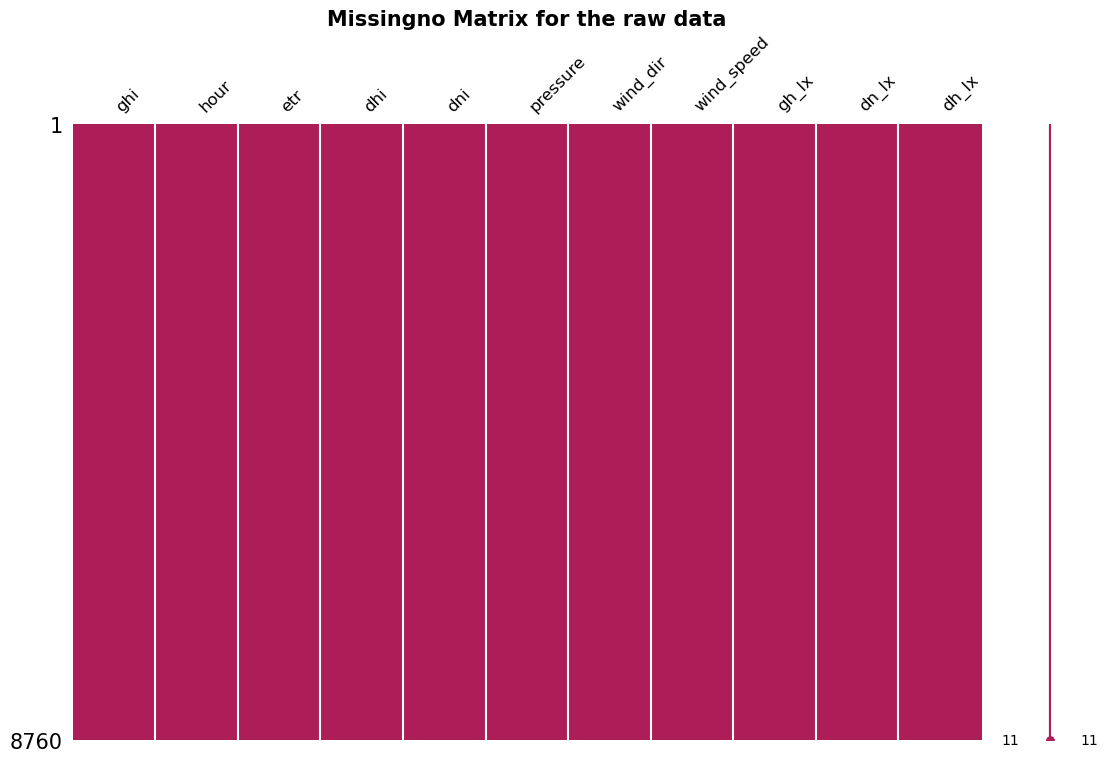

In [11]:
msn.matrix(df_ghi, color=(0.68, 0.12, 0.35), figsize=[13, 8], fontsize=12)
plt.title("Missingno Matrix for the raw data", fontsize=15, fontweight='bold')
plt.show()


In [12]:
df_ghi.isnull().sum()


ghi           0
hour          0
etr           0
dhi           0
dni           0
pressure      0
wind_dir      0
wind_speed    0
gh_lx         0
dn_lx         0
dh_lx         0
dtype: int64

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.4 Data cleaning </span>

In [13]:
df_ghi.dropna(axis='columns')

ghi  hour  etr  dhi  dni  pressure  wind_dir  wind_speed  gh_lx  dn_lx  \
0       0     1    0    0    0       989       270         4.6      0      0   
1       0     2    0    0    0       989       270         4.6      0      0   
2       0     3    0    0    0       990       230         3.1      0      0   
3       0     4    0    0    0       990       250         2.6      0      0   
4       0     5    0    0    0       991       250         3.6      0      0   
...   ...   ...  ...  ...  ...       ...       ...         ...    ...    ...   
8755    1    20    7    1    0       995       160         2.1      0      0   
8756    0    21    0    0    0       995       160         0.5      0      0   
8757    0    22    0    0    0       996       220         1.0      0      0   
8758    0    23    0    0    0       996       210         0.5      0      0   
8759    0     0    0    0    0       995         0         0.0      0      0   

      dh_lx  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
8755      0  
8756      0  
8757      0  
8758      0  
8759      0  

[8760 rows x 11 columns]

In [14]:
df_ghi.dropna(axis=0, how='any')


ghi  hour  etr  dhi  dni  pressure  wind_dir  wind_speed  gh_lx  dn_lx  \
0       0     1    0    0    0       989       270         4.6      0      0   
1       0     2    0    0    0       989       270         4.6      0      0   
2       0     3    0    0    0       990       230         3.1      0      0   
3       0     4    0    0    0       990       250         2.6      0      0   
4       0     5    0    0    0       991       250         3.6      0      0   
...   ...   ...  ...  ...  ...       ...       ...         ...    ...    ...   
8755    1    20    7    1    0       995       160         2.1      0      0   
8756    0    21    0    0    0       995       160         0.5      0      0   
8757    0    22    0    0    0       996       220         1.0      0      0   
8758    0    23    0    0    0       996       210         0.5      0      0   
8759    0     0    0    0    0       995         0         0.0      0      0   

      dh_lx  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
8755      0  
8756      0  
8757      0  
8758      0  
8759      0  

[8760 rows x 11 columns]

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.5 Find duplicate Cells </span>

In [15]:
duplicated_cells = 0
check_duplicate = df_ghi.duplicated()


In [16]:
for row in check_duplicate:
    if row:
        duplicated_cells += 1

duplicated_prc = (duplicated_cells / len(check_duplicate)) * 100
print("• Total Cells:", len(check_duplicate), '\n'
     "• Duplicated Cells:", duplicated_cells,'\n'
     "• Duplicate %:", duplicated_prc)

• Total Cells: 8760 
• Duplicated Cells: 287 
• Duplicate %: 3.276255707762557


In [17]:
data_values = np.array([duplicated_cells, len(df_ghi)-duplicated_cells])
explode = [0.2, 0]
labels = ["Duplicate Cells", "Unique Cells"]
title = "Pie Chart: Unique vs Duplicate cells (Pre-processing)"


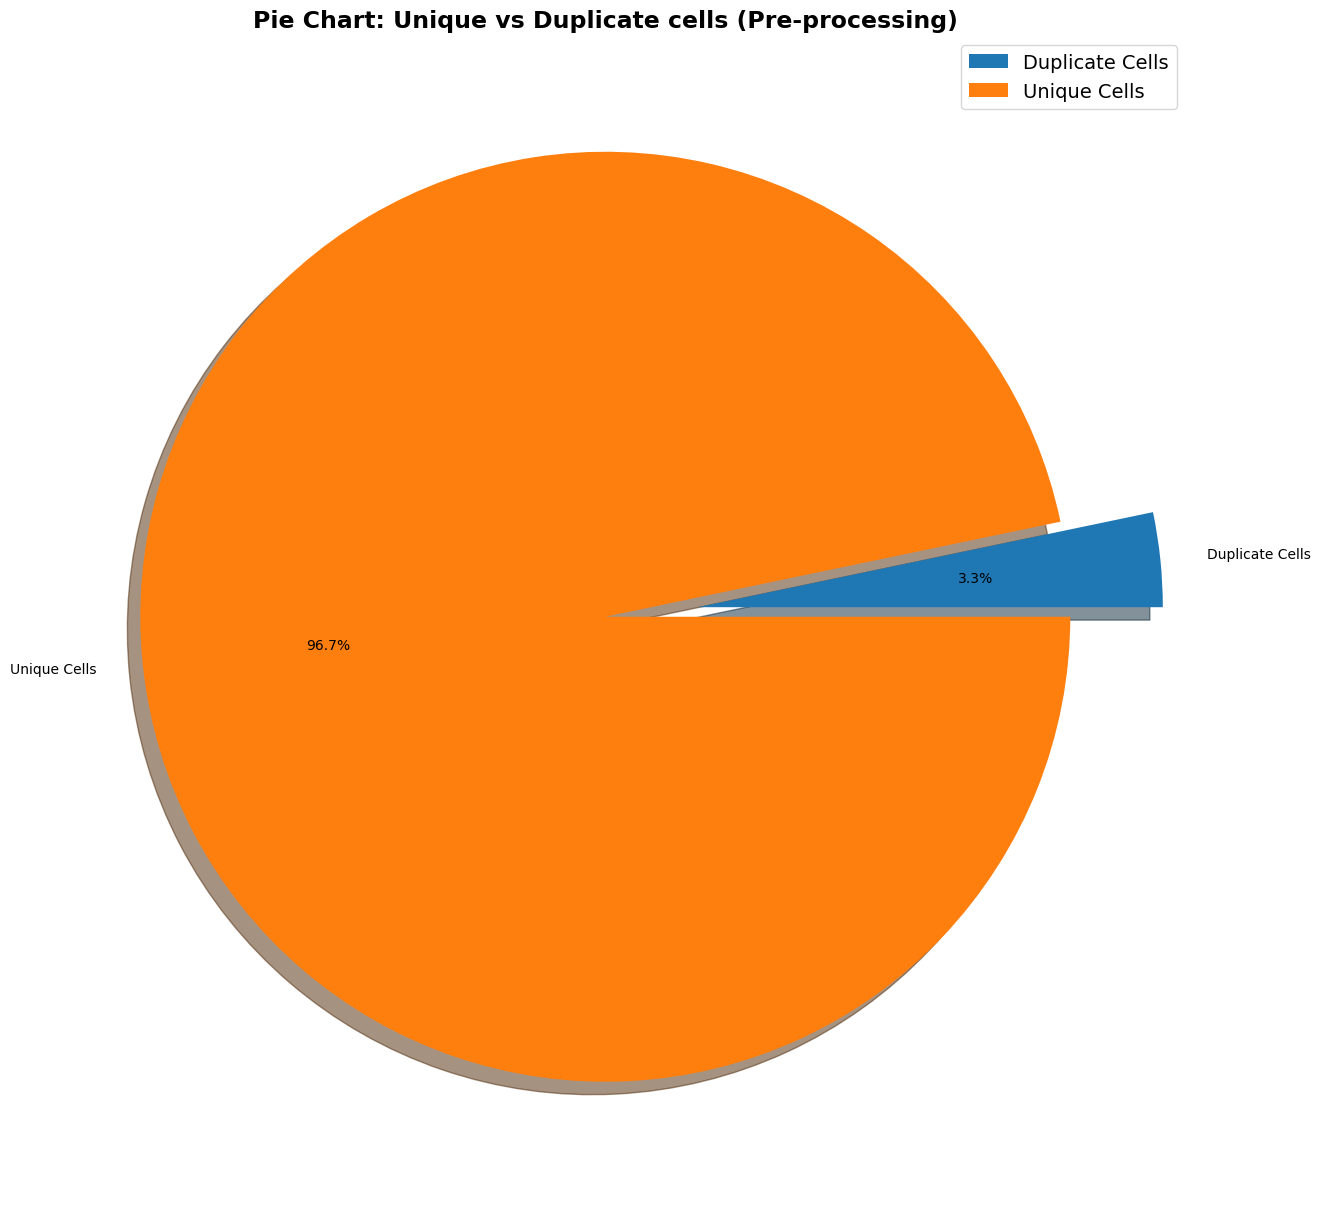

In [18]:
plt.figure(figsize=(15, 20))
plt.pie(data_values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title(title, fontsize=17, fontweight='bold')
plt.axis('off')
plt.legend(fontsize="14", loc="upper right")
plt.show()


In [19]:
df_ghi = df_ghi.drop_duplicates(subset=None, keep='first', inplace=False,
                                                    ignore_index=False)



In [20]:
duplicated_cells = 0
check_duplicate = df_ghi.duplicated()

for row in check_duplicate:
    if row:
        duplicated_cells += 1

print("• Number of duplicated cells after de-duplication:", duplicated_cells)


• Number of duplicated cells after de-duplication: 0


In [21]:
df_ghi.shape


(8473, 11)

In [22]:
data_values = np.array([duplicated_cells, len(df_ghi) - duplicated_cells])
explode = [0.2, 0]
labels = ["Duplicate Cells", "Unique Cells"]
title = "Pie Chart: Unique vs Duplicate cells (Post-processing)"



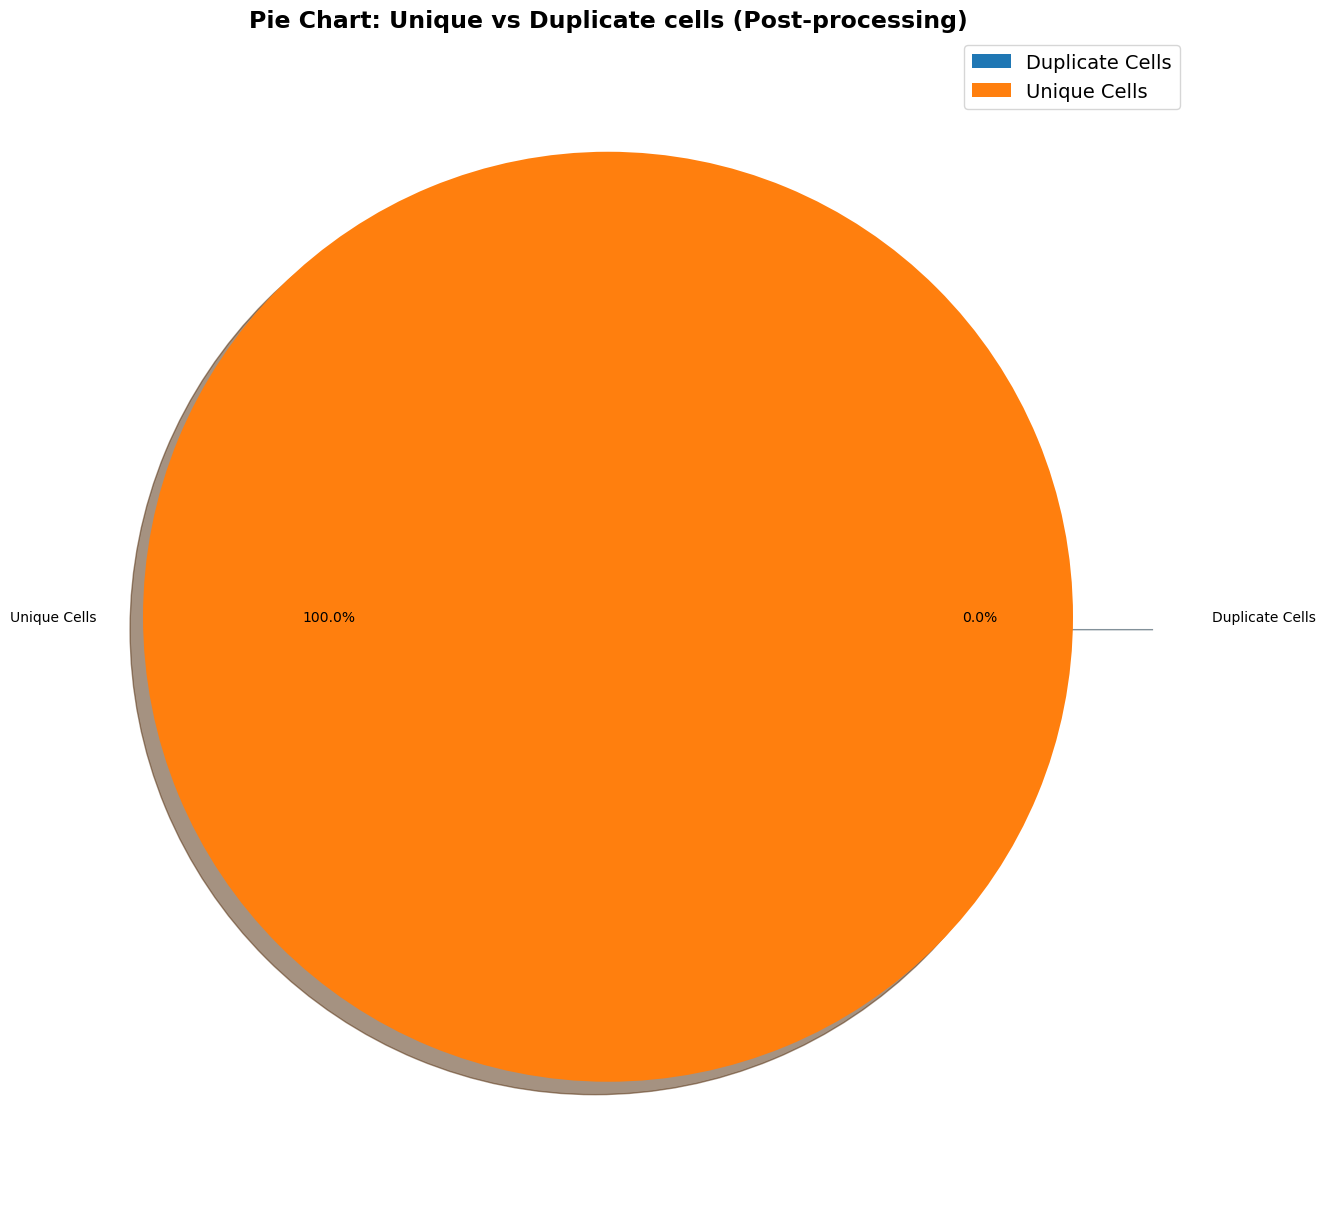

In [23]:
plt.figure(figsize=(15, 20))
plt.pie(data_values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title(title, fontsize=17, fontweight='bold')
plt.axis('off')
plt.legend(fontsize="14", loc="upper right")
plt.show()



<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.6 Check for Outliers </span>

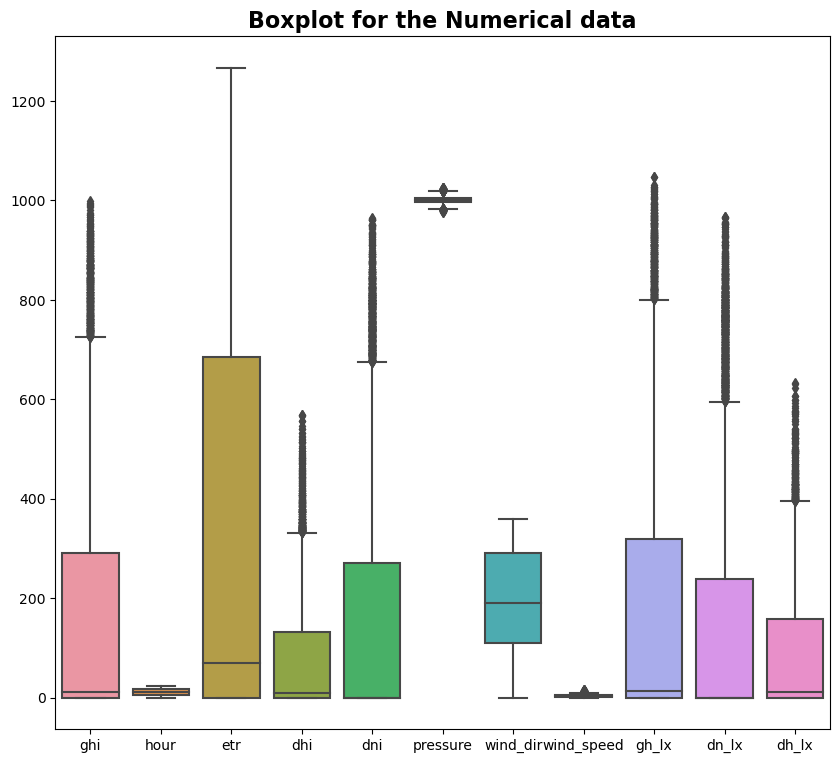

In [24]:
plt.figure(figsize=(10, 9))
sns.boxplot(df_ghi)
plt.title("Boxplot for the Numerical data", fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.7 Combine Features</span>

In [25]:
print("Current Features")
df_ghi.columns


Current Features


Index(['ghi', 'hour', 'etr', 'dhi', 'dni', 'pressure', 'wind_dir',
       'wind_speed', 'gh_lx', 'dn_lx', 'dh_lx'],
      dtype='object')

In [26]:
df_ghi['lx_combined'] = df_ghi['gh_lx'] + df_ghi['dn_lx'] + df_ghi['dh_lx']
df_ghi['lx_combined'].head(25)


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7       77
8      539
9      619
10    1209
11    1392
12    1327
13     531
14     930
15     256
16      14
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
Name: lx_combined, dtype: int64

In [27]:
print("Post-processed Features")
df_ghi.columns


Post-processed Features


Index(['ghi', 'hour', 'etr', 'dhi', 'dni', 'pressure', 'wind_dir',
       'wind_speed', 'gh_lx', 'dn_lx', 'dh_lx', 'lx_combined'],
      dtype='object')

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.8 Review & Save the processed data for future Model Integration</span>

In [28]:
try:
    df_ghi.to_csv('../dataset/processed/ghi_processed.csv', sep=',', index=False)
    df_ghi.to_json('../dataset/processed/ghi_processed.json')

except Exception as exc:
    print("! Exception encountered", exc)

else:
    print("Dataframe successfully saved")    

Dataframe successfully saved


<span style="font-family:Cambria; color:#0261ab; font-size: 30px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 2 Feature Analysis  </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 2.1 Univariate Inspection </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Global Horizontal Irradiance (GHI) </span>

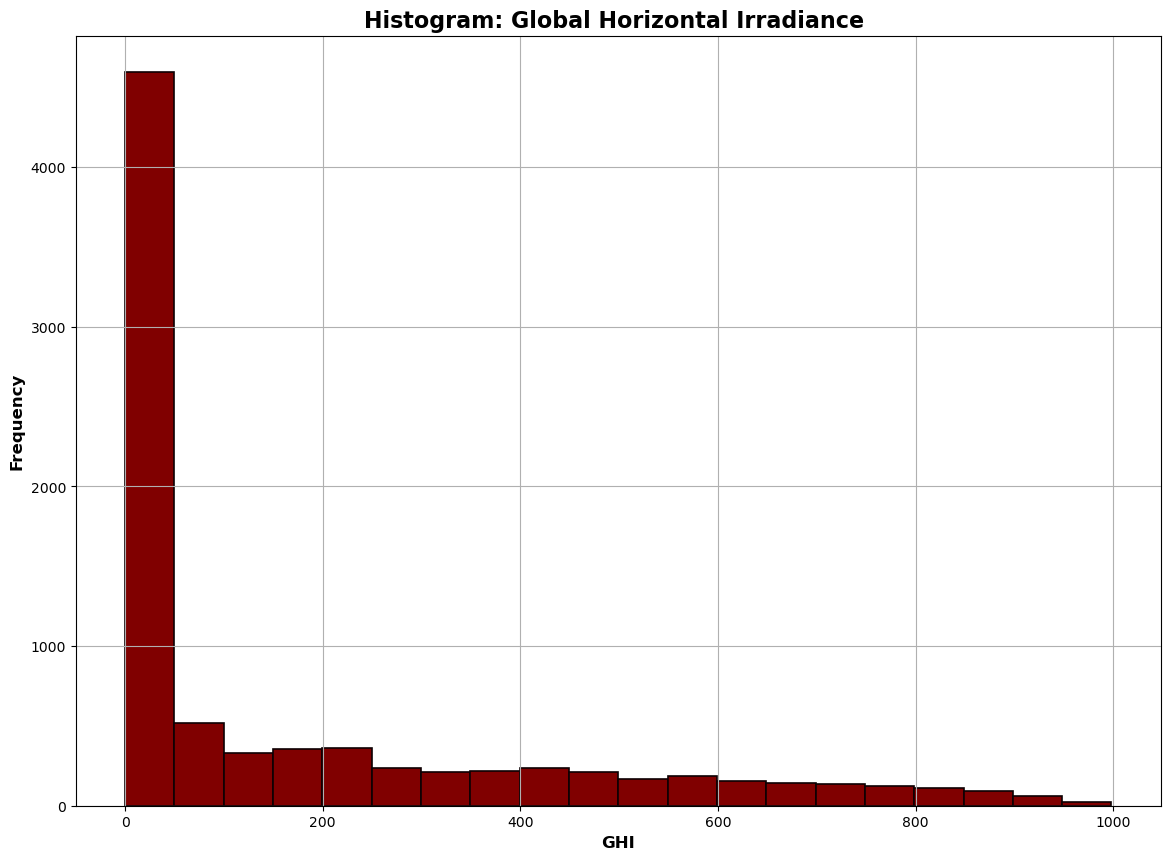

In [29]:
plt.figure(figsize=(14, 10))
plt.hist(df_ghi['ghi'], bins=20, color='maroon', edgecolor='#0d0103', linewidth=1.2)
plt.title("Histogram: Global Horizontal Irradiance ", fontsize=16, fontweight='bold')
plt.xlabel("GHI", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.grid()
plt.show()


In [30]:
analysis = df_ghi['ghi'].sort_values(ascending=False)
analysis


7428    998
3467    995
3323    993
3468    991
3324    988
       ... 
3484      0
3483      0
3482      0
3481      0
8758      0
Name: ghi, Length: 8473, dtype: int64

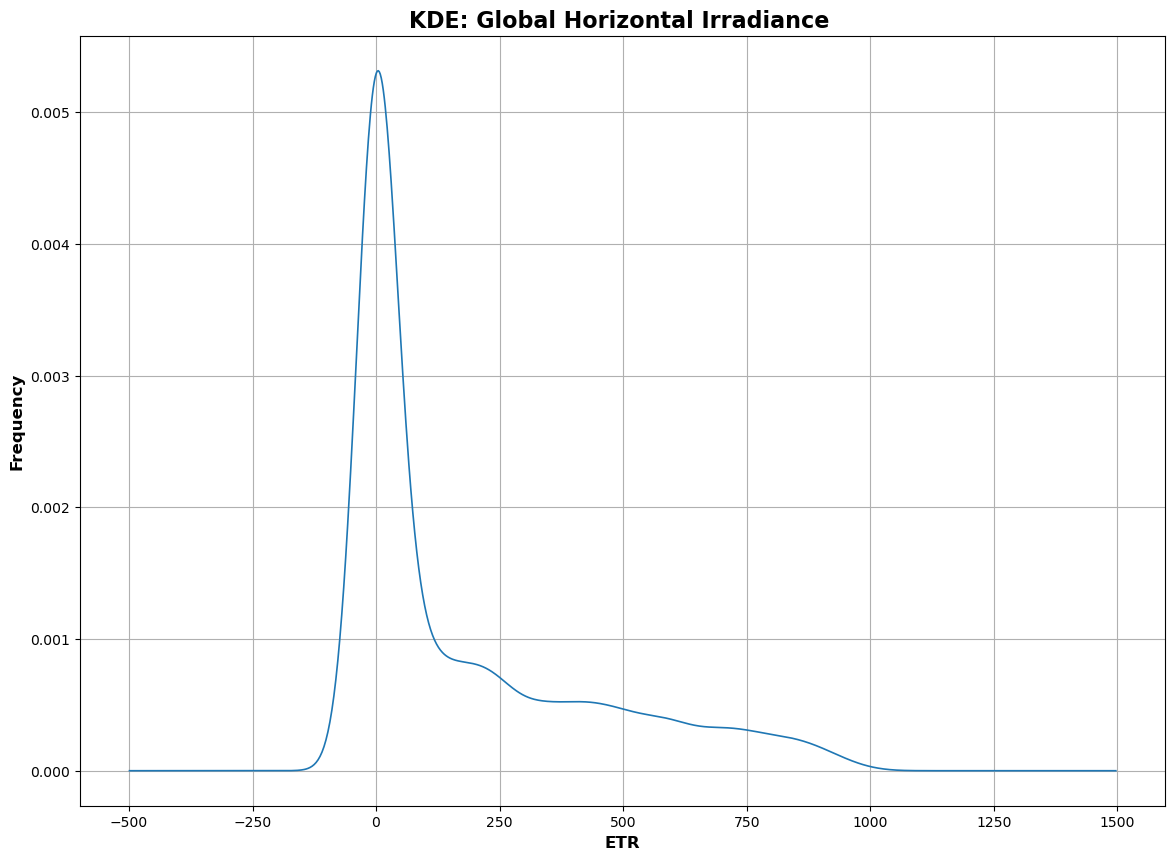

In [31]:
plt.figure(figsize=(14, 10))
df_ghi['ghi'].plot(kind='kde', linewidth=1.2)
plt.title("KDE: Global Horizontal Irradiance ", fontsize=16, fontweight='bold')
plt.xlabel("ETR", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.grid()
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Extraterrestrial radiation (ETR) </span>

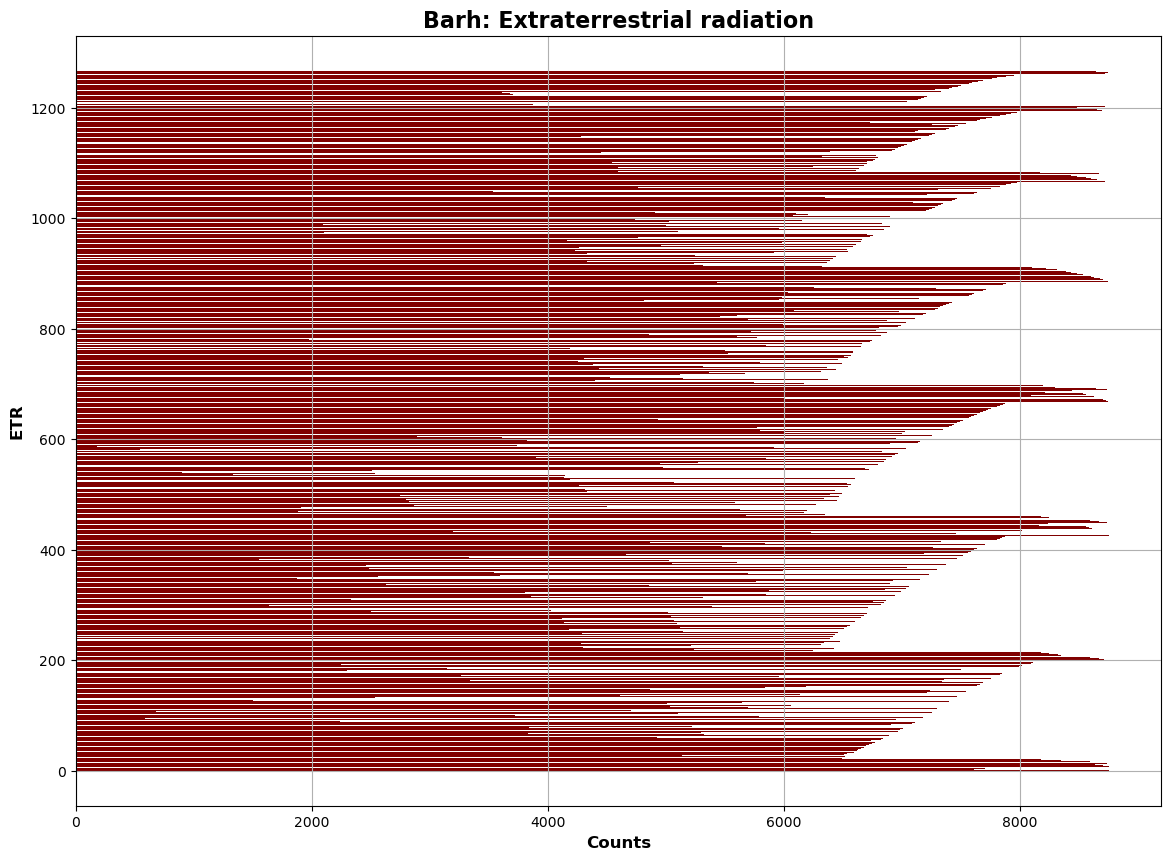

In [32]:
plt.figure(figsize=(14, 10))
plt.barh(df_ghi['etr'].values, df_ghi['etr'].index, color='maroon')
plt.title("Barh: Extraterrestrial radiation", fontsize=16, fontweight='bold')
plt.xlabel("Counts", fontsize=12, fontweight='bold')
plt.ylabel("ETR", fontsize=12, fontweight='bold')
plt.grid()
plt.show()


In [33]:
print("ETR Standard Deviation")
df_ghi['etr'].std()


ETR Standard Deviation


419.96462464823674

In [34]:
print("ETR Mean")
df_ghi['etr'].mean()


ETR Mean


347.8114009205712

In [35]:
print("ETR Median")
df_ghi['etr'].median()


ETR Median


70.0

In [36]:
print("ETR Minimum Value")
df_ghi['etr'].min()

ETR Minimum Value


0

In [37]:
print("ETR Maximum Value")
df_ghi['etr'].max()

ETR Maximum Value


1267

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Direct Horizontal Irradiation (DHI) </span>

In [38]:
df_ghi['dhi'].describe()


count    8473.000000
mean       78.003777
std       105.590644
min         0.000000
25%         0.000000
50%         9.000000
75%       133.000000
max       569.000000
Name: dhi, dtype: float64

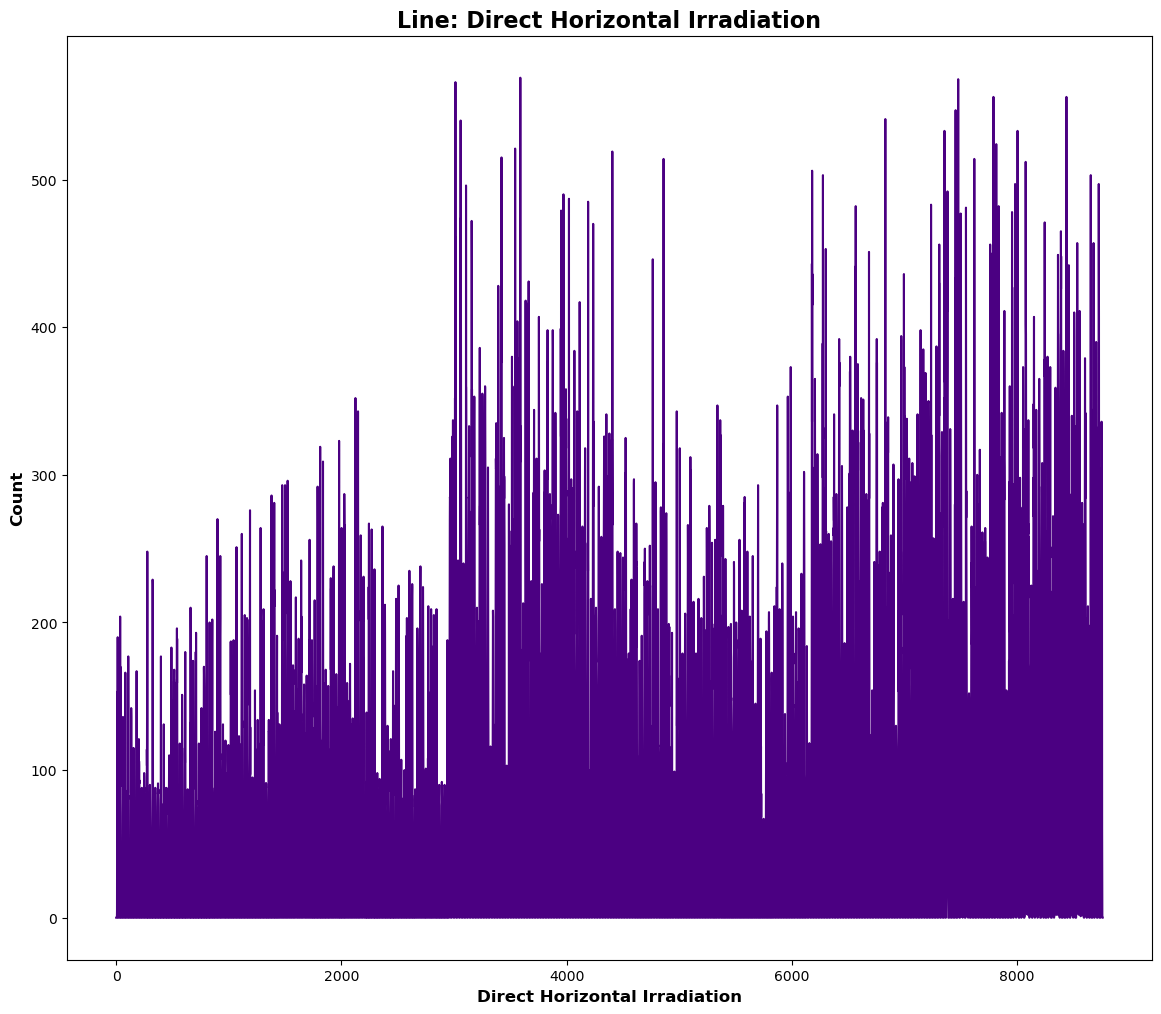

In [39]:
plt.figure(figsize=(14, 12))
plt.plot(df_ghi['dhi'], color='indigo')
plt.title('Line: Direct Horizontal Irradiation', fontsize=16, fontweight='bold')
plt.xlabel('Direct Horizontal Irradiation', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

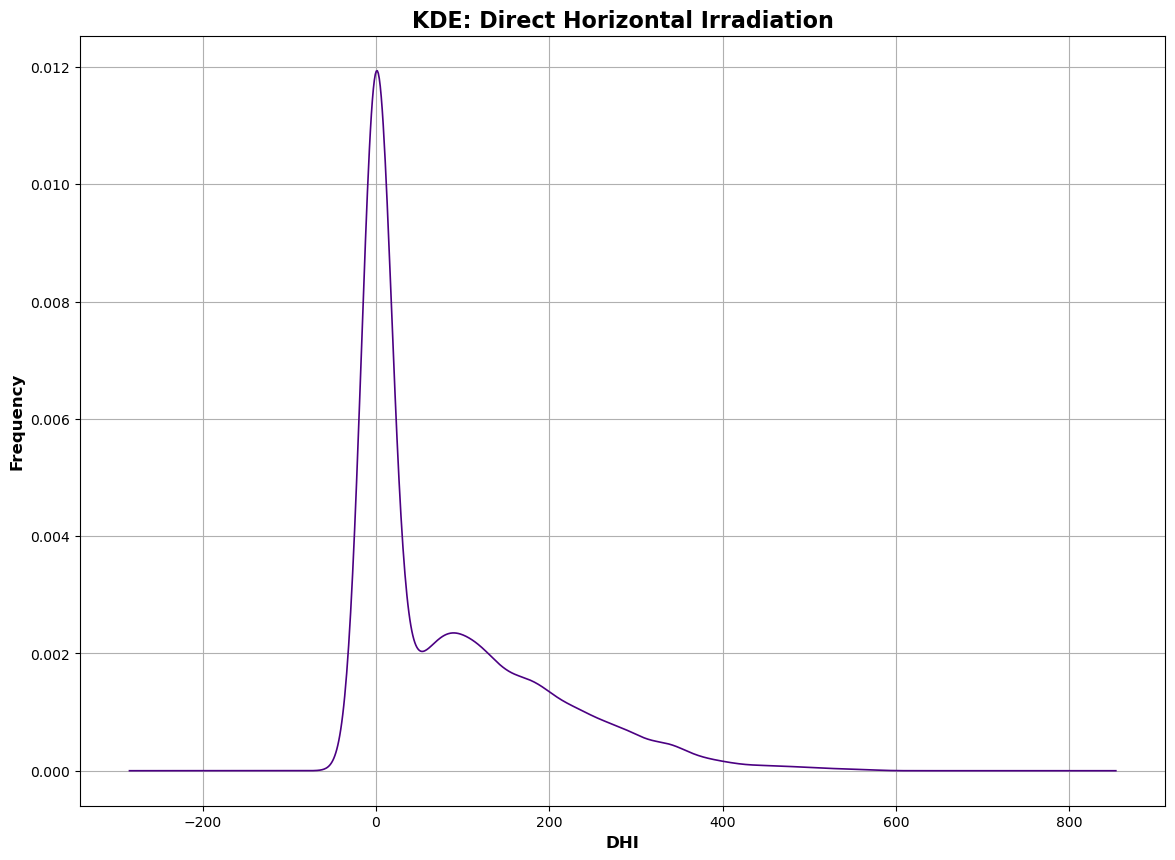

In [40]:
plt.figure(figsize=(14, 10))
df_ghi['dhi'].plot(kind='kde', linewidth=1.2, color='indigo')
plt.title("KDE: Direct Horizontal Irradiation", fontsize=16, fontweight='bold')
plt.xlabel("DHI", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.grid()
plt.show()

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Direct Normal Irradiation (DNI) </span>

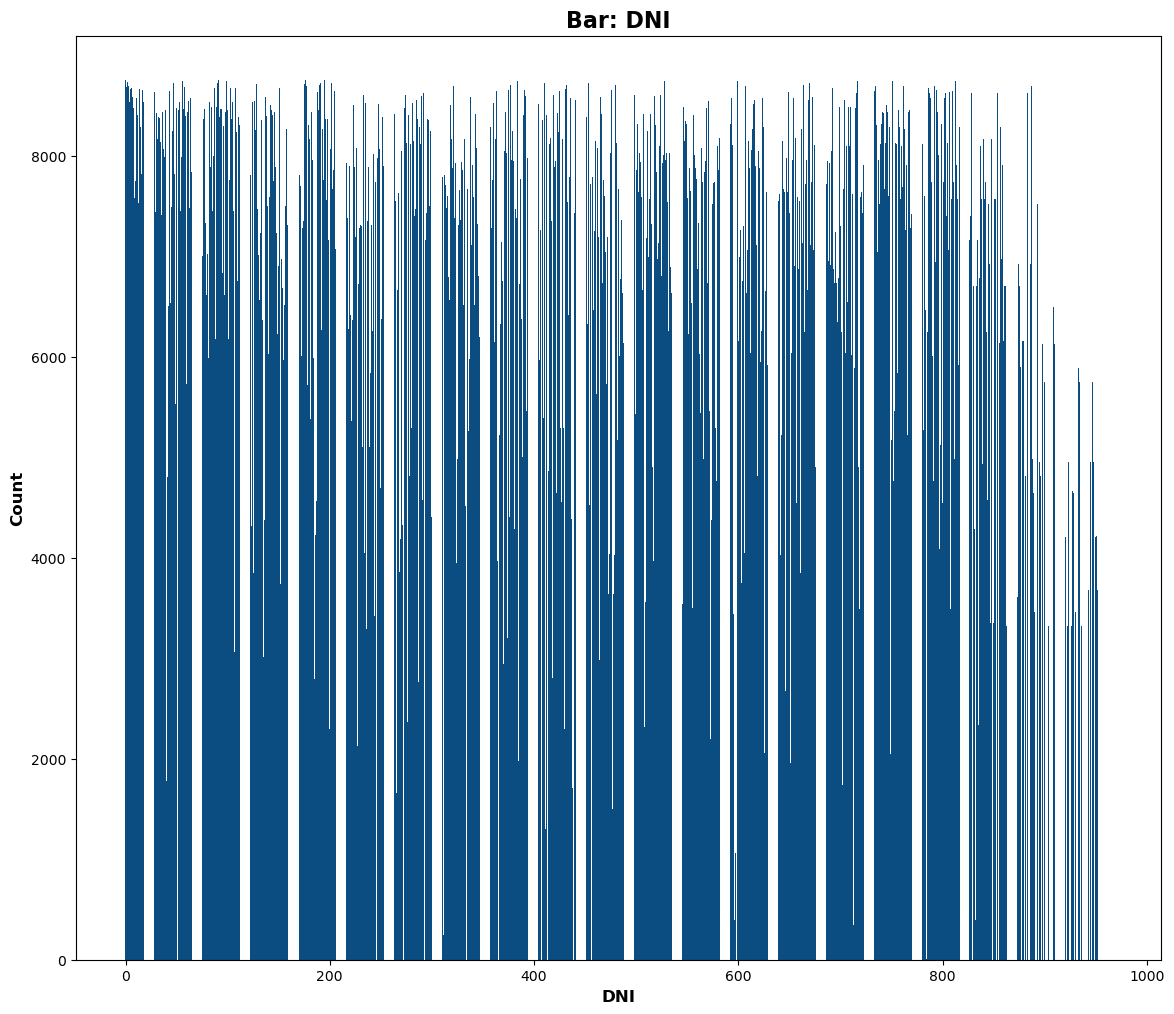

In [41]:
plt.figure(figsize=(14, 12))
plt.bar(df_ghi['dni'].values, df_ghi['dni'].index, color='#0b4d80')
plt.title('Bar: DNI', fontsize=16, fontweight='bold')
plt.xlabel('DNI', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


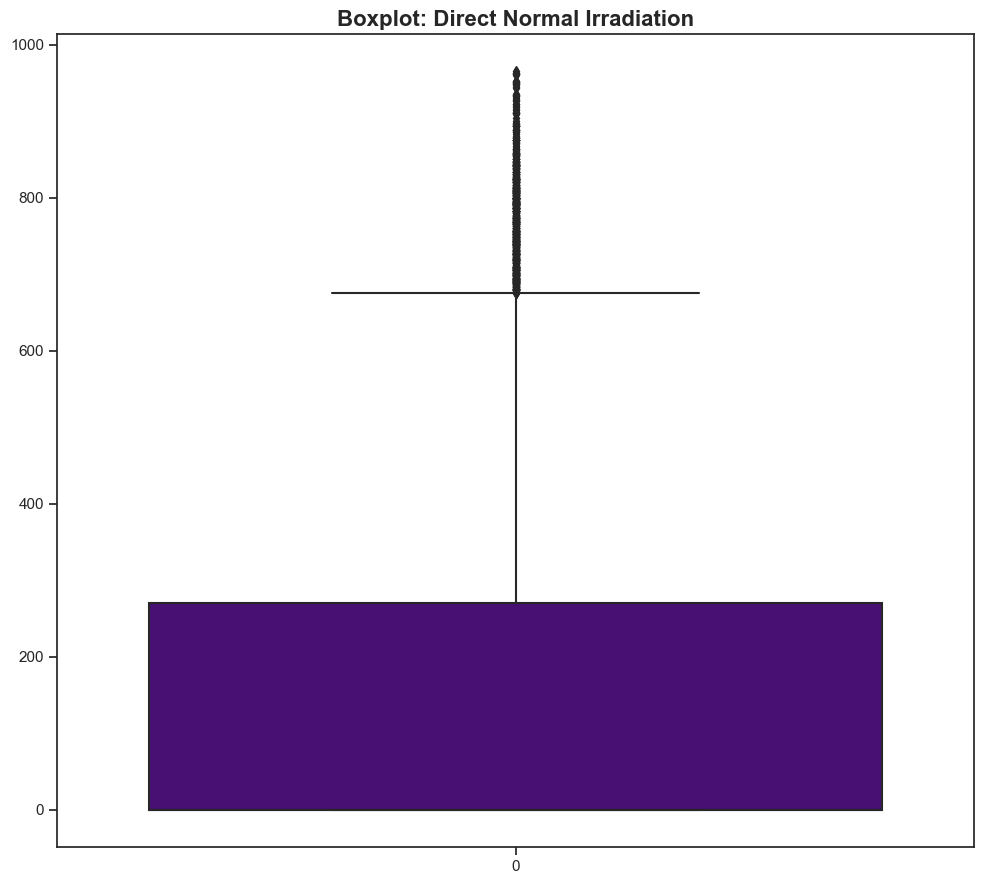

In [77]:
plt.figure(figsize=(10, 9))
sns.boxplot(df_ghi['dni'], color='indigo')
plt.title("Boxplot: Direct Normal Irradiation",  fontsize=16, fontweight='bold')
plt.show()


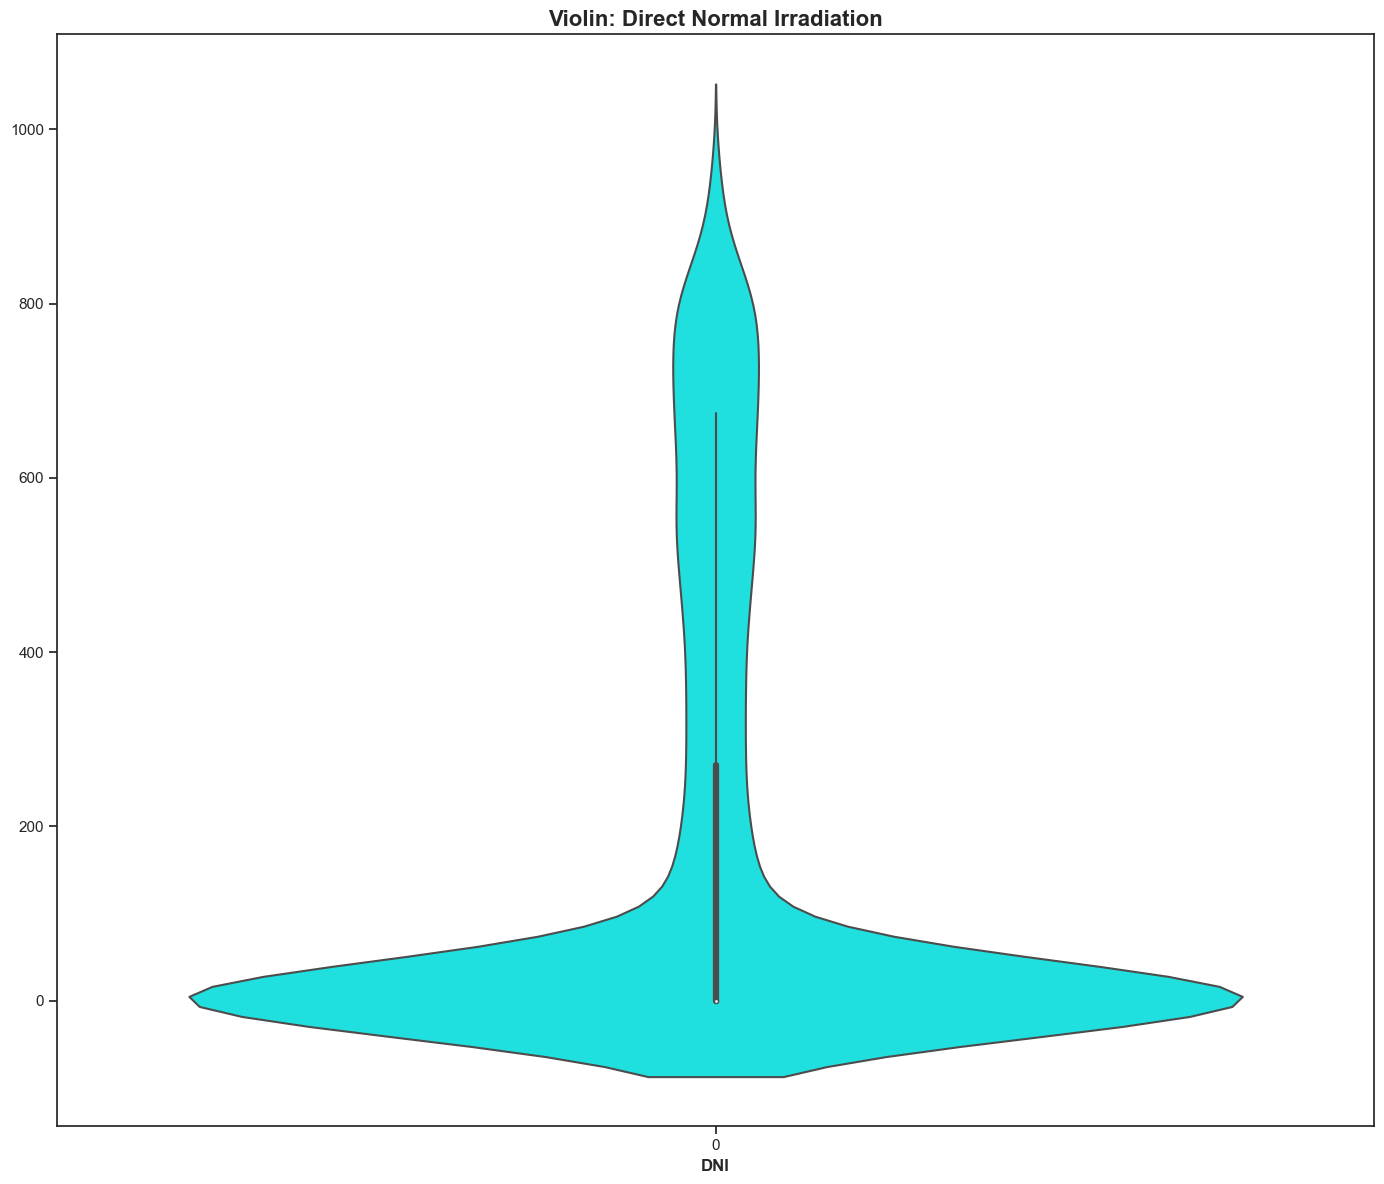

In [78]:
plt.figure(figsize=(14, 12))
sns.violinplot(df_ghi['dni'], color='cyan')
plt.title('Violin: Direct Normal Irradiation', fontsize=16, fontweight='bold')
plt.xlabel('DNI', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Air Pressure </span>

In [44]:
df_ghi['pressure'].describe()

count    8473.000000
mean     1000.895078
std         6.991747
min       976.000000
25%       996.000000
50%      1001.000000
75%      1005.000000
max      1025.000000
Name: pressure, dtype: float64

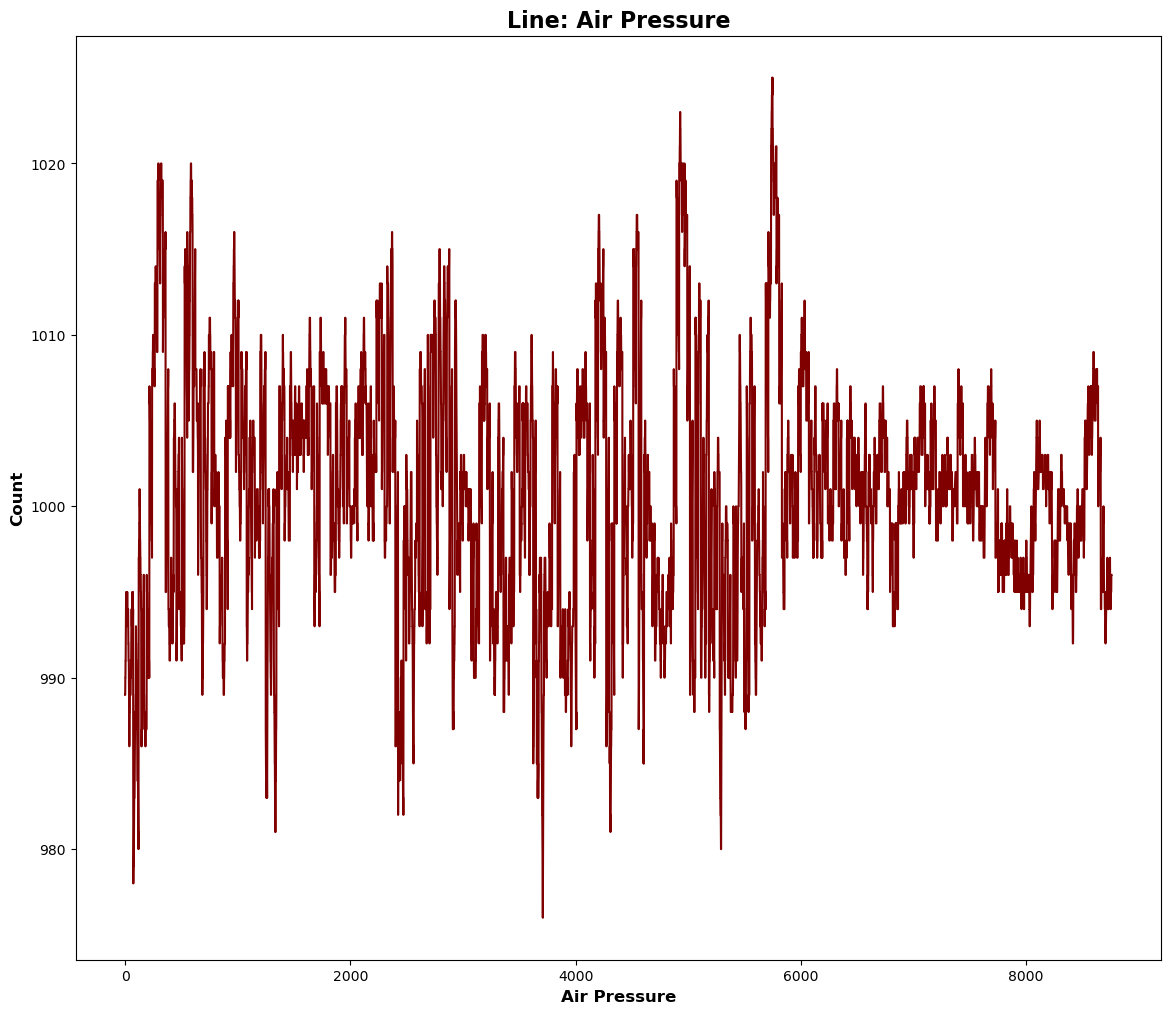

In [45]:
plt.figure(figsize=(14, 12))
plt.plot(df_ghi['pressure'], color='maroon')
plt.title('Line: Air Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Air Pressure', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

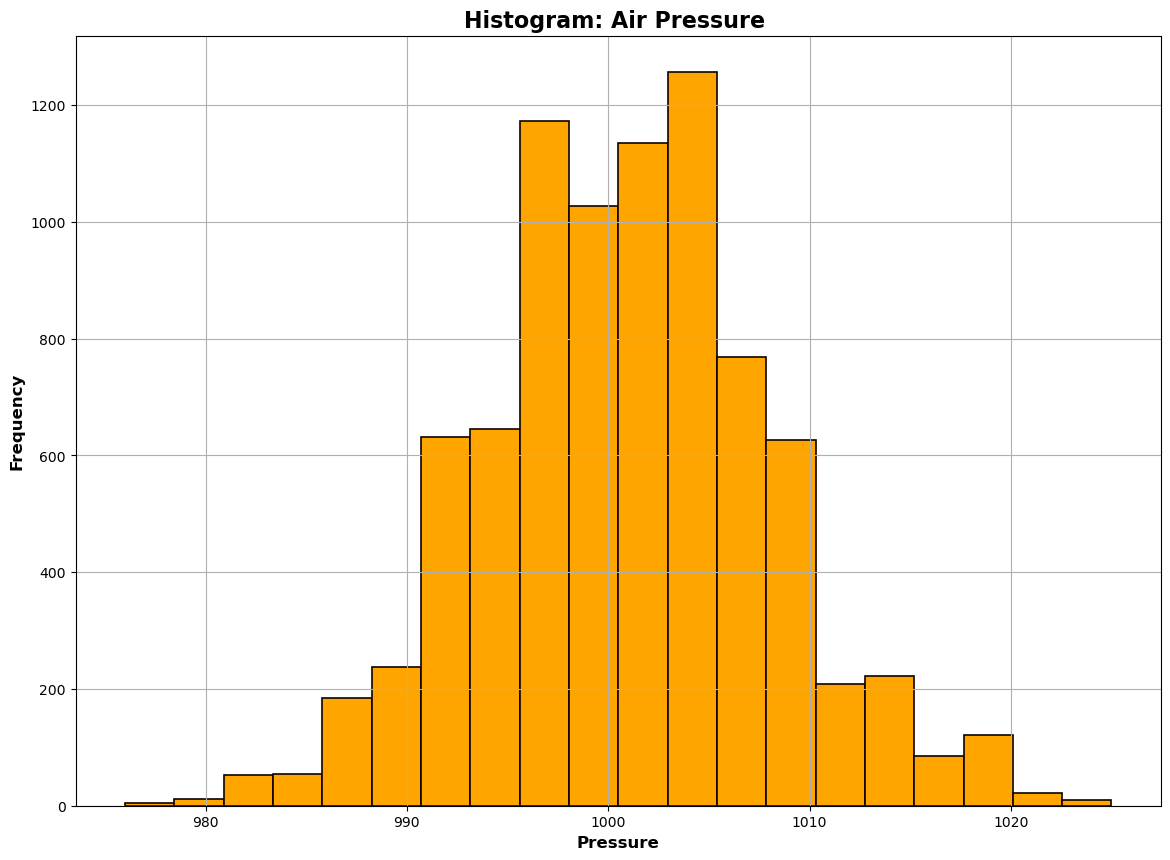

In [46]:
plt.figure(figsize=(14, 10))
plt.hist(df_ghi['pressure'], bins=20, color='orange', edgecolor='#0d0103', linewidth=1.2)
plt.title("Histogram: Air Pressure ", fontsize=16, fontweight='bold')
plt.xlabel("Pressure", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.grid()
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Wind Direction </span>

In [47]:
df_ghi['wind_dir'].describe()


count    8473.000000
mean      190.799009
std       109.969462
min         0.000000
25%       110.000000
50%       190.000000
75%       290.000000
max       360.000000
Name: wind_dir, dtype: float64

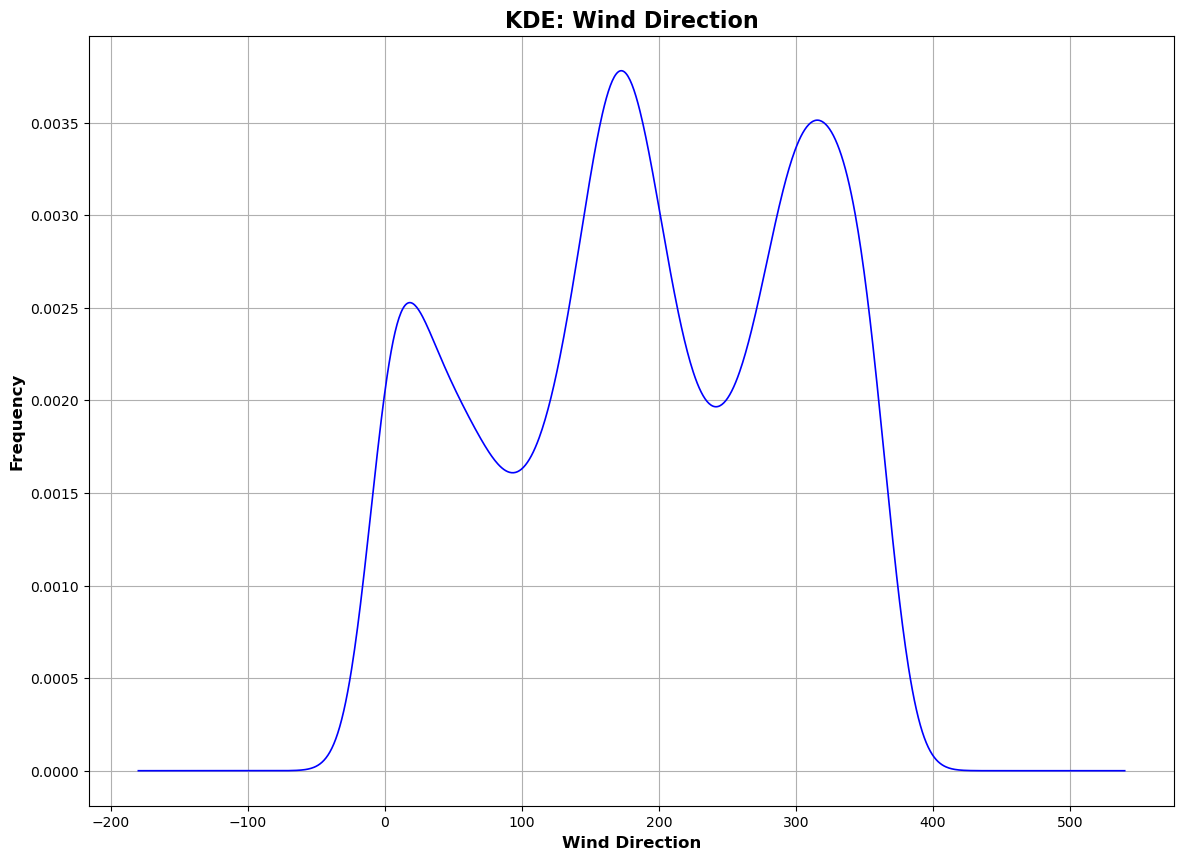

In [48]:
plt.figure(figsize=(14, 10))
df_ghi['wind_dir'].plot(kind='kde', linewidth=1.2, color='blue')
plt.title("KDE: Wind Direction", fontsize=16, fontweight='bold')
plt.xlabel("Wind Direction", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.grid()
plt.show()


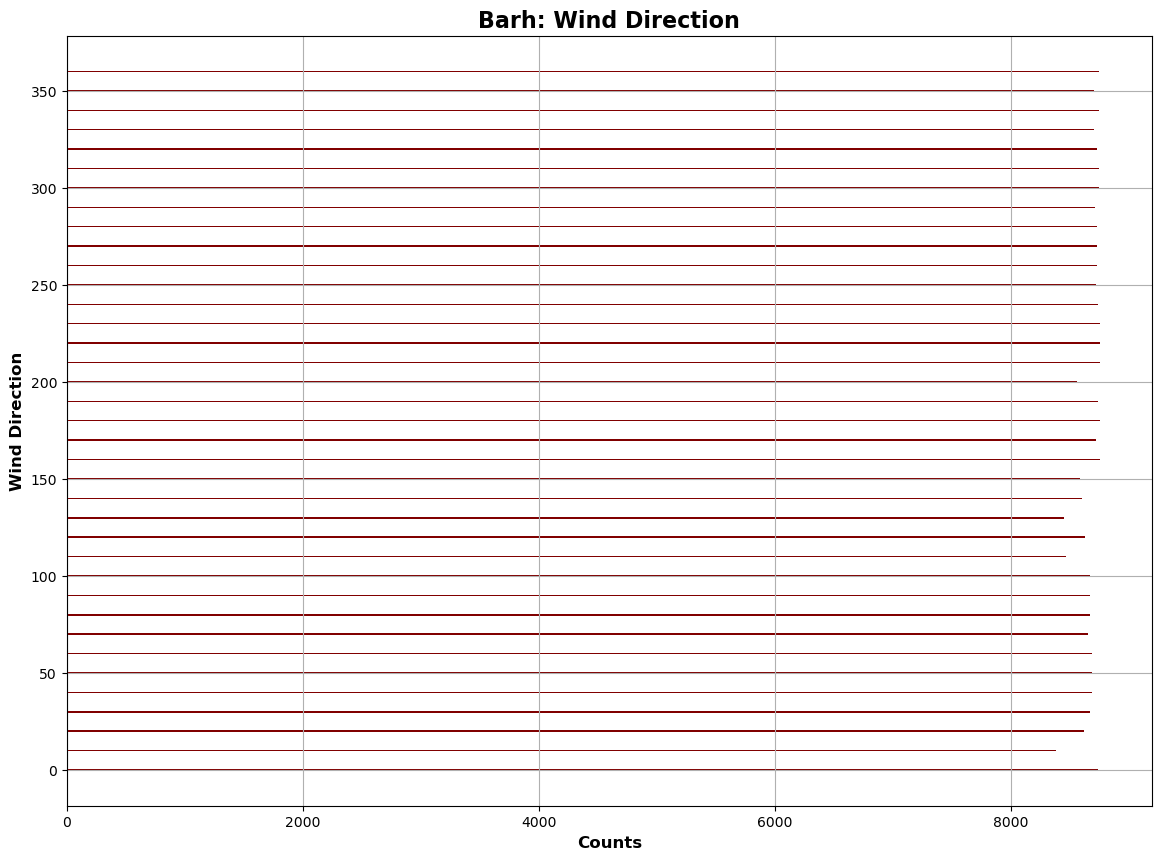

In [49]:
plt.figure(figsize=(14, 10))
plt.barh(df_ghi['wind_dir'].values, df_ghi['wind_dir'].index, color='maroon')
plt.title("Barh: Wind Direction", fontsize=16, fontweight='bold')
plt.xlabel("Counts", fontsize=12, fontweight='bold')
plt.ylabel("Wind Direction", fontsize=12, fontweight='bold')
plt.grid()
plt.show()

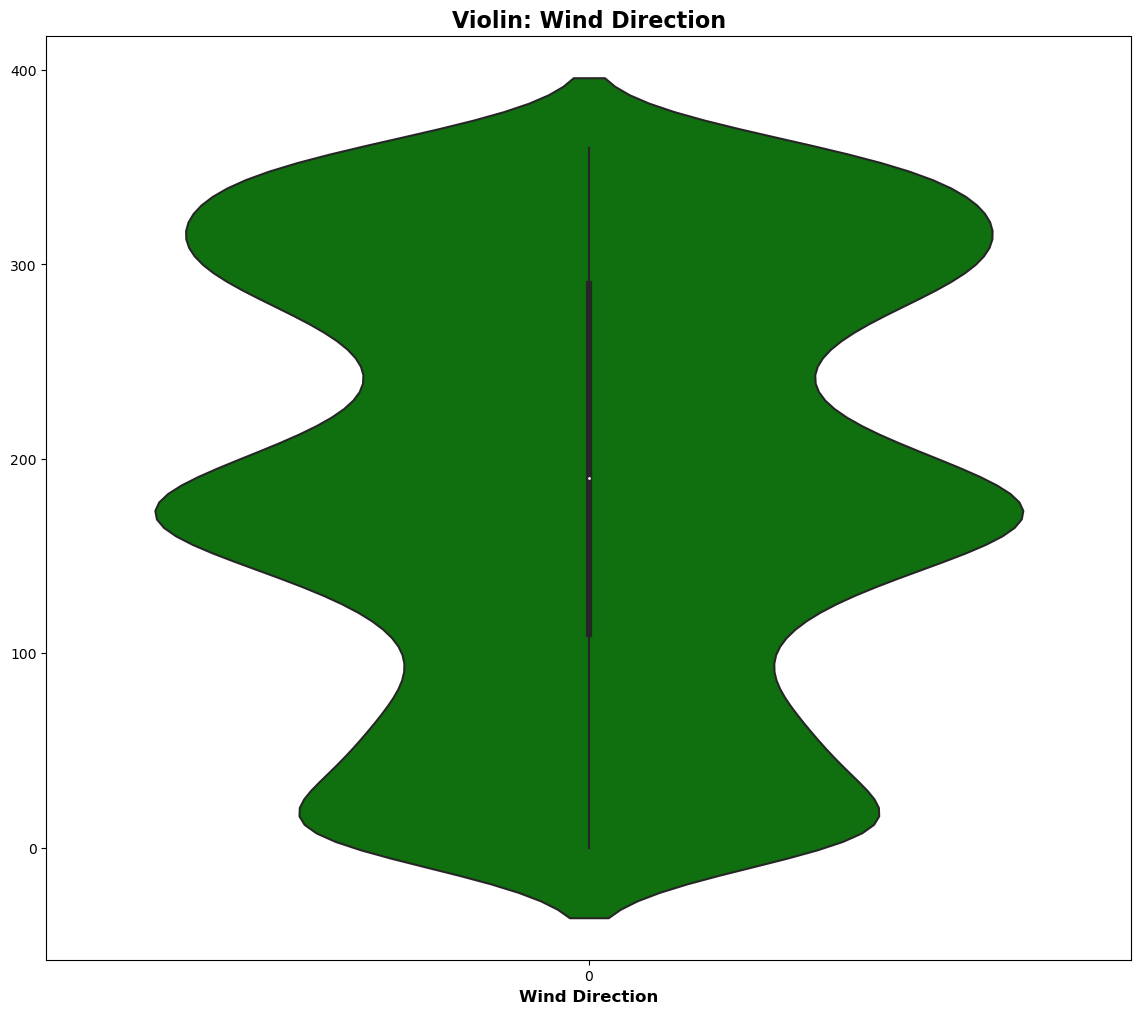

In [50]:
plt.figure(figsize=(14, 12))
sns.violinplot(df_ghi['wind_dir'], color='green')
plt.title('Violin: Wind Direction', fontsize=16, fontweight='bold')
plt.xlabel('Wind Direction', fontsize=12, fontweight='bold')
plt.show()

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Wind Speed </span>

In [51]:
df_ghi['wind_speed'].describe()


count    8473.000000
mean        3.508592
std         2.382999
min         0.000000
25%         1.500000
50%         3.100000
75%         4.600000
max        15.900000
Name: wind_speed, dtype: float64

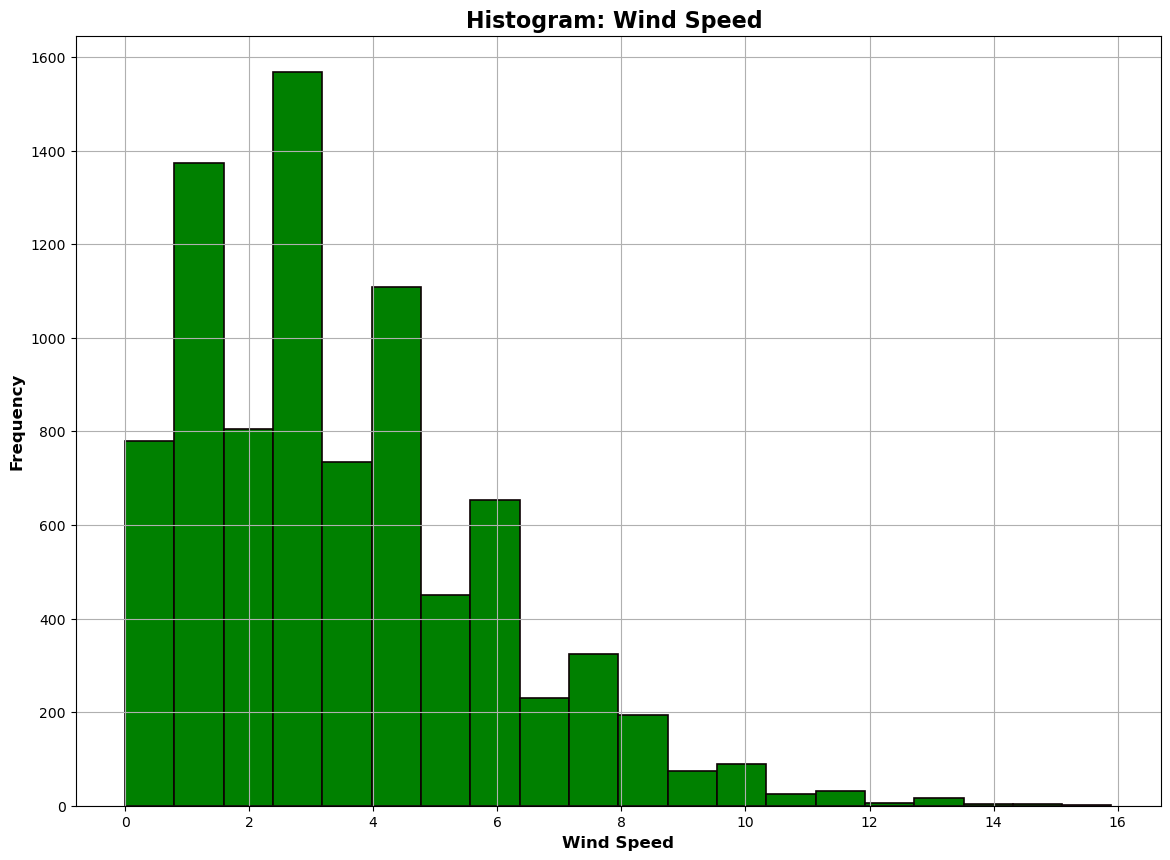

In [52]:
plt.figure(figsize=(14, 10))
plt.hist(df_ghi['wind_speed'], bins=20, color='green', edgecolor='#0d0103', linewidth=1.2)
plt.title("Histogram: Wind Speed ", fontsize=16, fontweight='bold')
plt.xlabel("Wind Speed", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.grid()
plt.show()


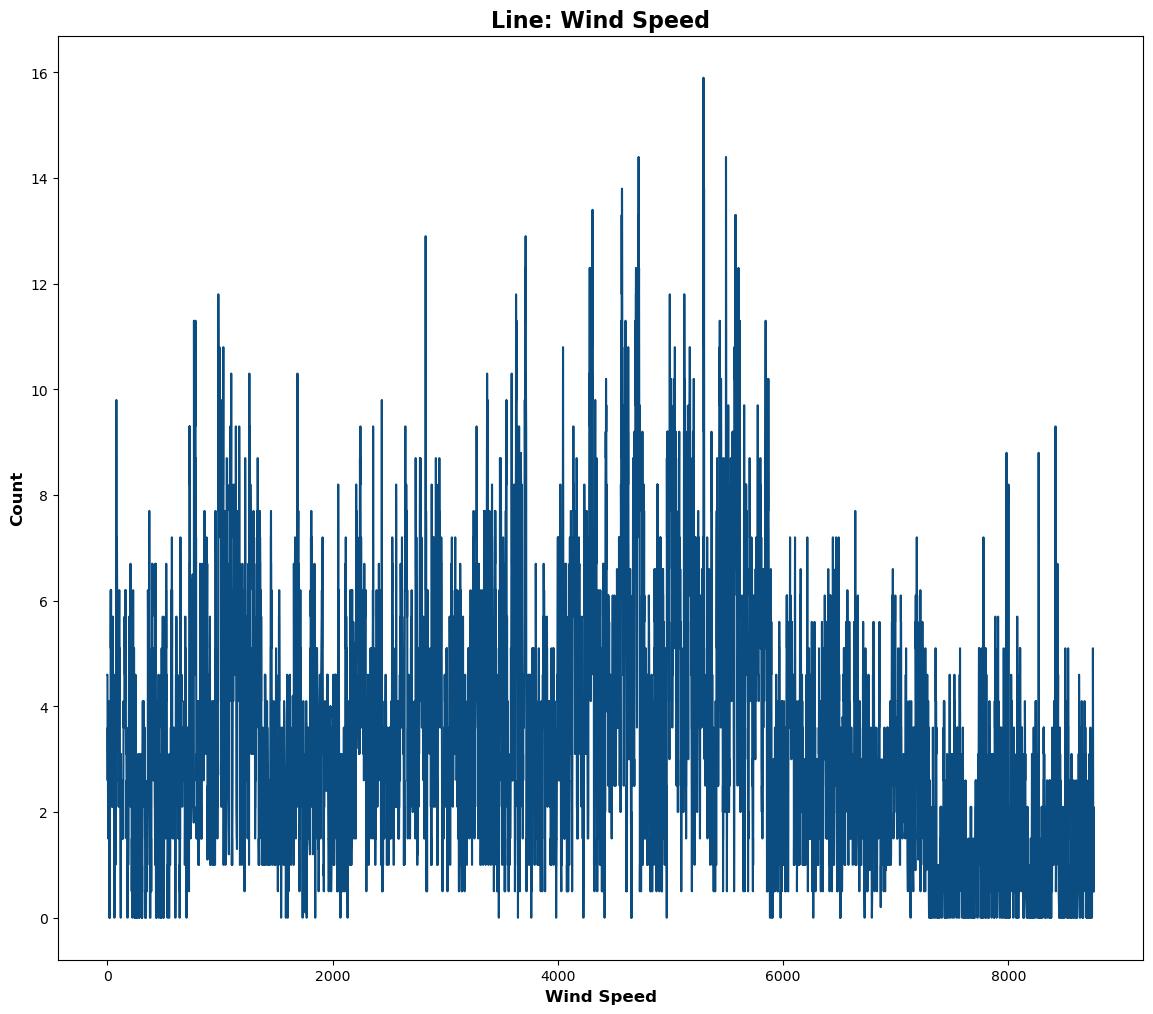

In [53]:
plt.figure(figsize=(14, 12))
plt.plot(df_ghi['wind_speed'], color='#0b4d80')
plt.title('Line: Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Wind Speed', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


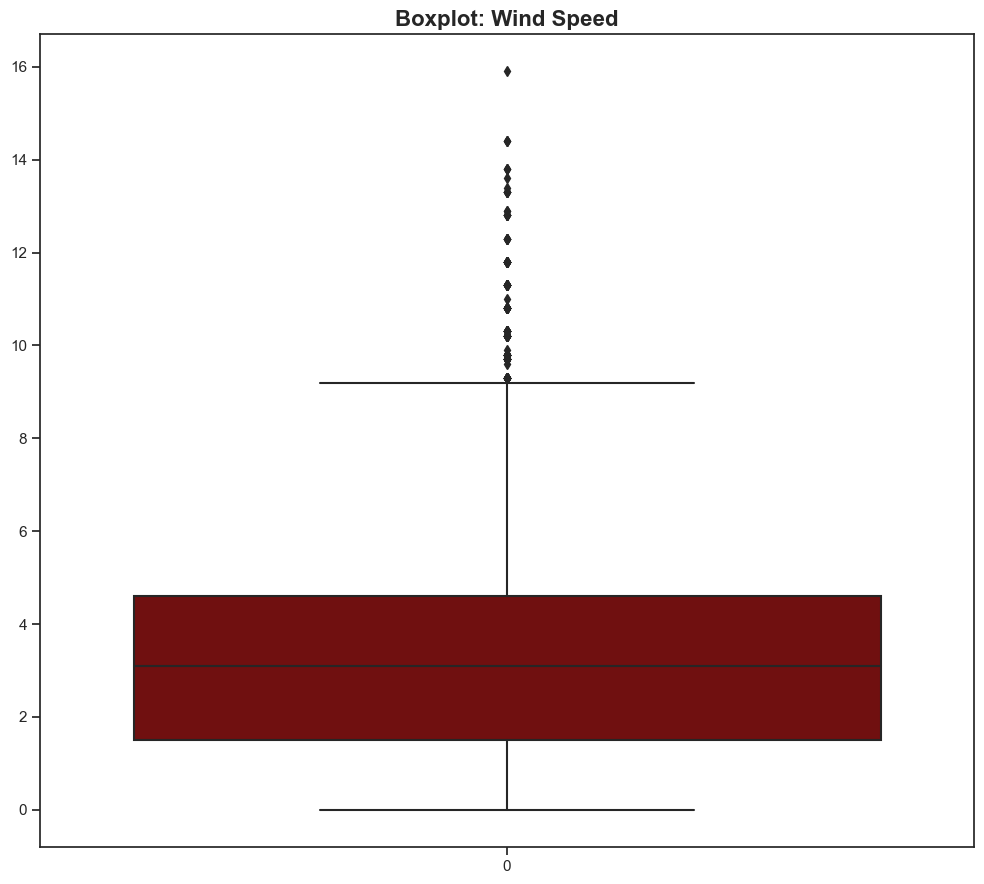

In [80]:
plt.figure(figsize=(10, 9))
sns.boxplot(df_ghi['wind_speed'], color='maroon')
plt.title("Boxplot: Wind Speed",  fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Unit of Combined Illuminance (lx) </span>

In [55]:
df_ghi['lx_combined'].describe()


count    8473.000000
mean      438.045438
std       600.486315
min         0.000000
25%         0.000000
50%        44.000000
75%       796.000000
max      2147.000000
Name: lx_combined, dtype: float64

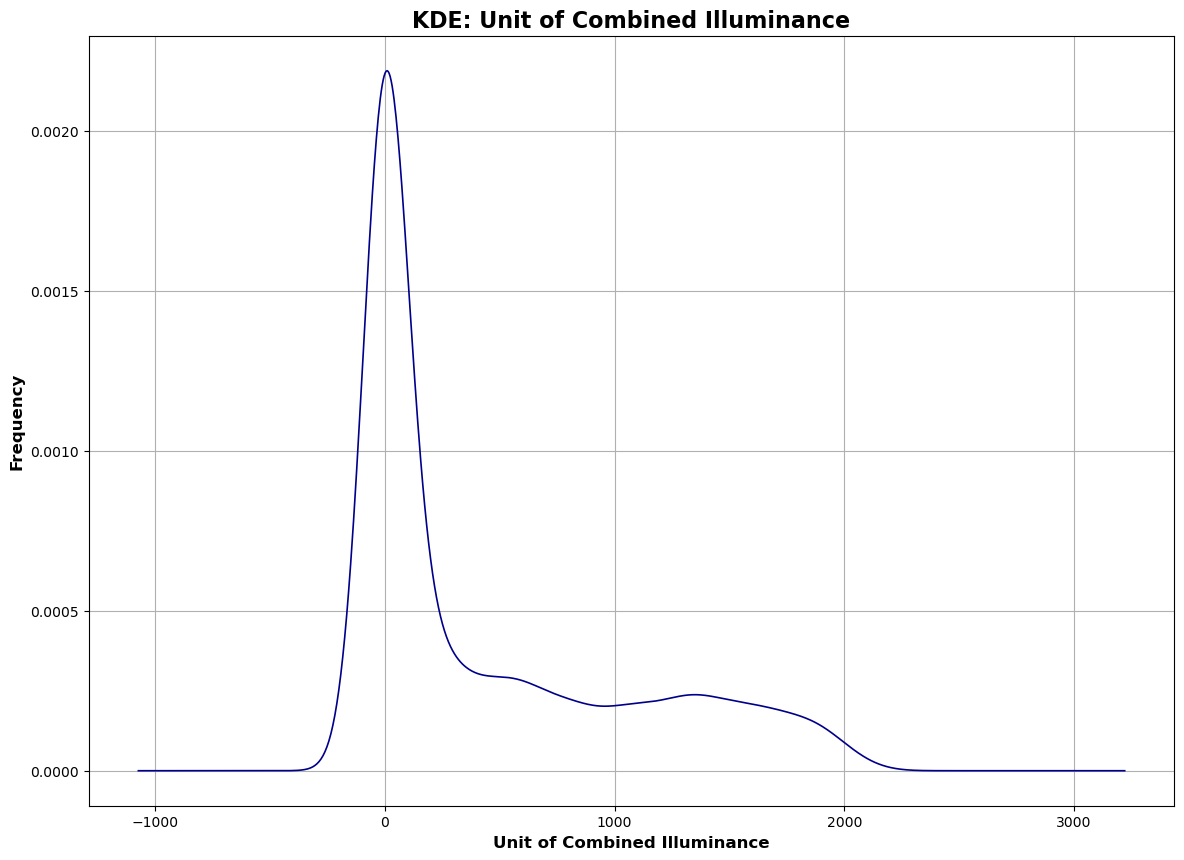

In [56]:
plt.figure(figsize=(14, 10))
df_ghi['lx_combined'].plot(kind='kde', linewidth=1.2, color='darkblue')
plt.title("KDE: Unit of Combined Illuminance", fontsize=16, fontweight='bold')
plt.xlabel("Unit of Combined Illuminance", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.grid()
plt.show()

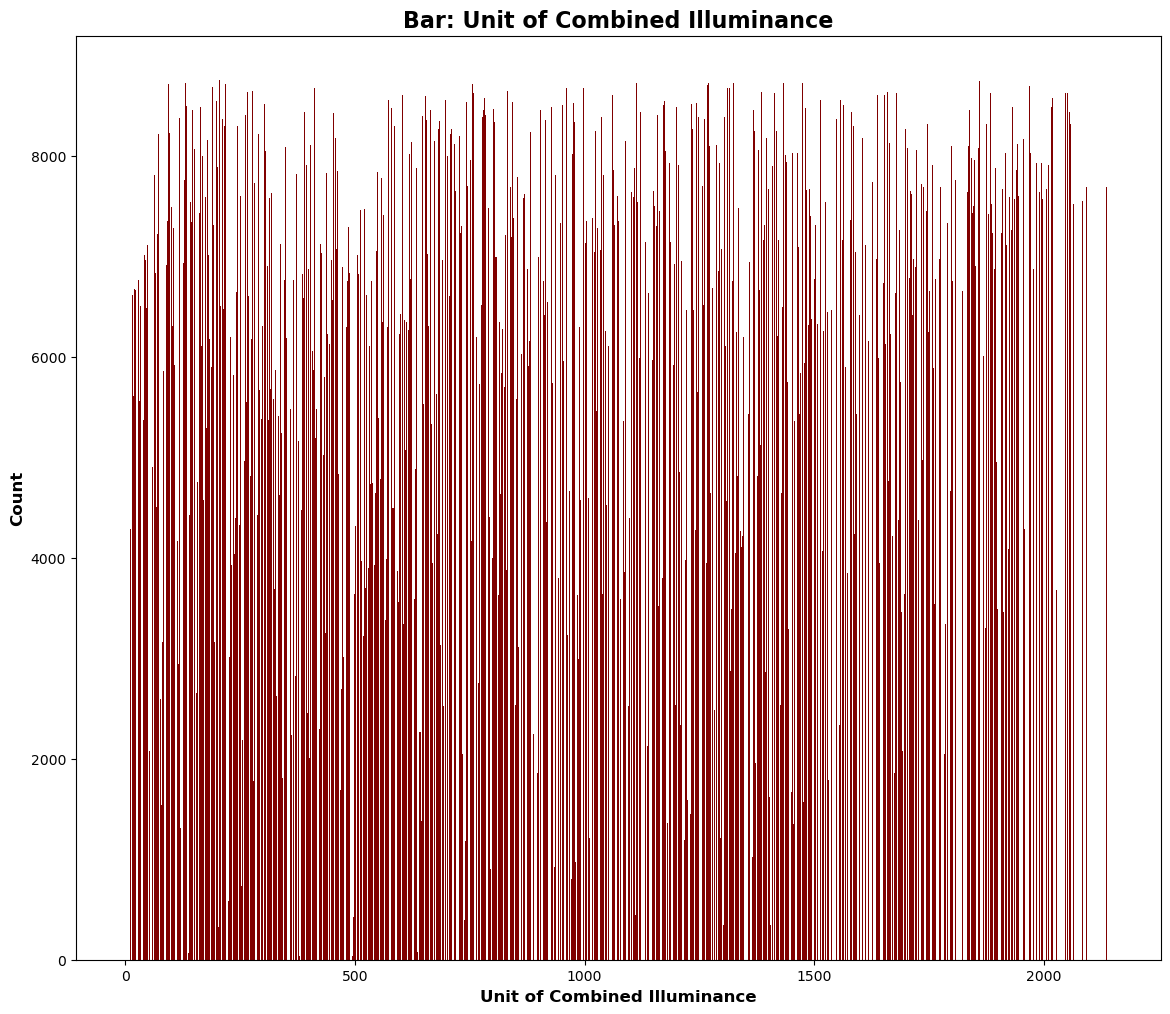

In [57]:
plt.figure(figsize=(14, 12))
plt.bar(df_ghi['lx_combined'].values, df_ghi['lx_combined'].index, color='maroon')
plt.title('Bar: Unit of Combined Illuminance', fontsize=16, fontweight='bold')
plt.xlabel('Unit of Combined Illuminance', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 2.2 Bivariate Inspection </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> GHI - Hour (ghi/hr) </span>

In [58]:
df_heatmap = df_ghi[['ghi', 'hour']].copy()
df_heatmap.head(15)


ghi  hour
0     0     1
1     0     2
2     0     3
3     0     4
4     0     5
5     0     6
6     0     7
7     8     8
8   171     9
9   228    10
10  417    11
11  467    12
12  475    13
13  223    14
14  307    15

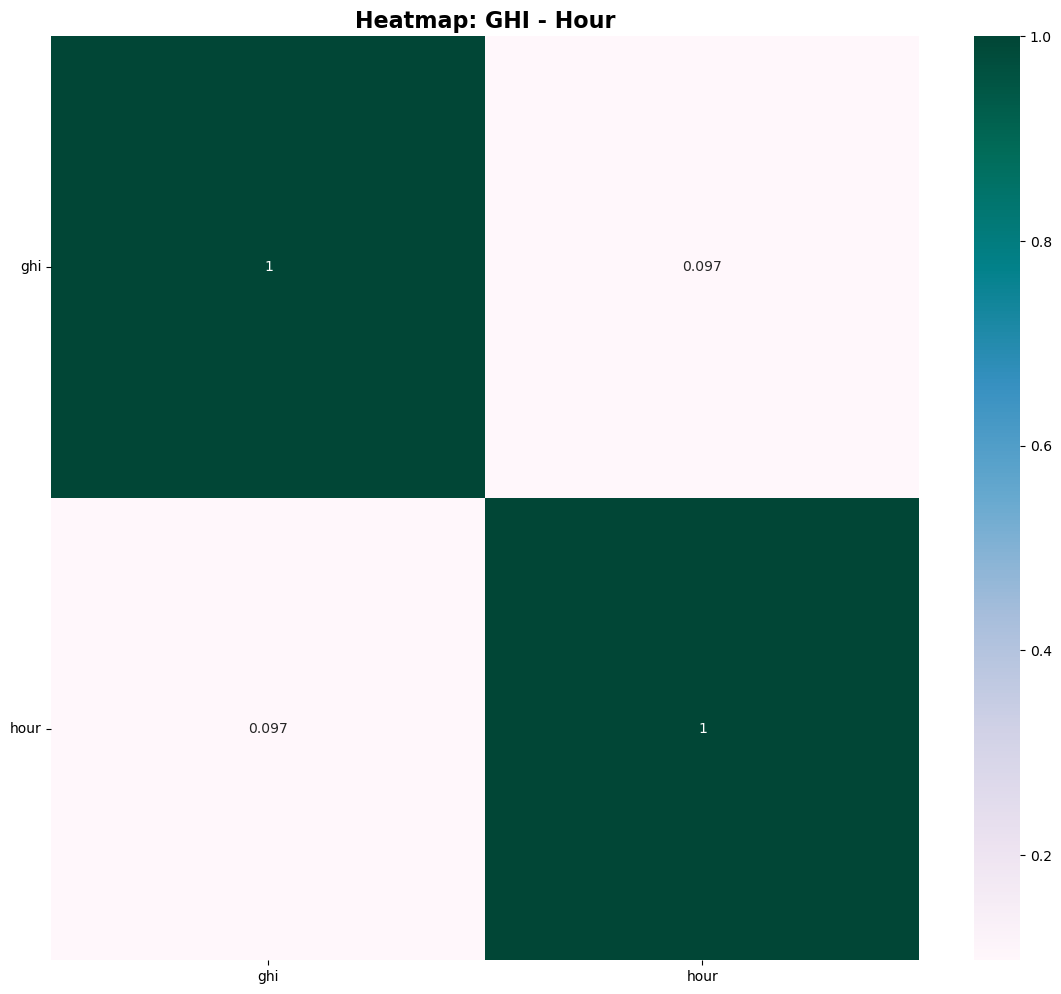

In [59]:
plt.figure(figsize=(14, 12))
title = "Heatmap: GHI - Hour"
data_plot = sns.heatmap(df_heatmap.corr(), cmap="PuBuGn", annot=True)

plt.title(title, fontsize=16, fontweight='bold')
plt.yticks(rotation='horizontal')
plt.show()



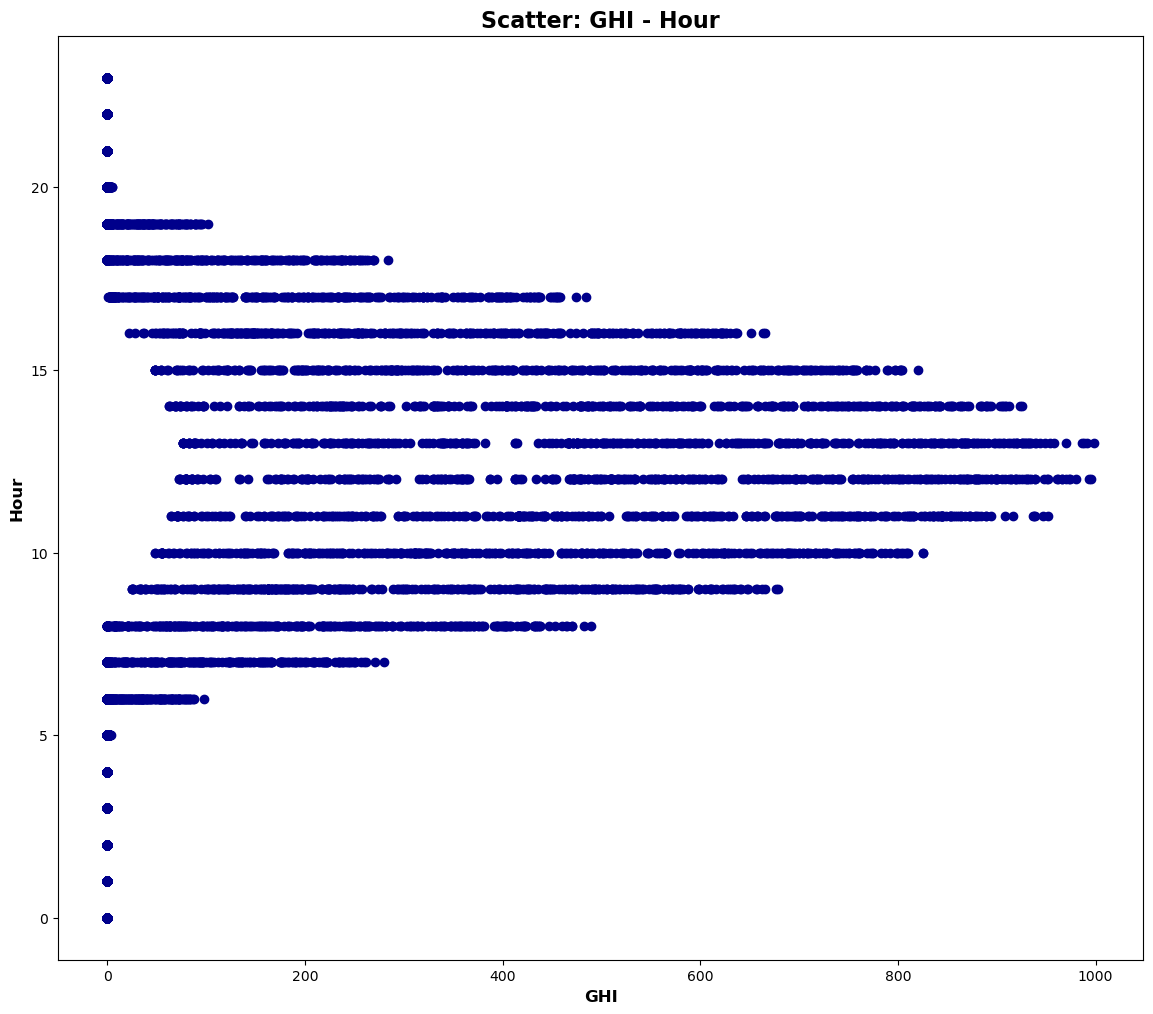

In [60]:
plt.figure(figsize=(14, 12))
plt.scatter(df_ghi['ghi'], df_ghi['hour'], color='darkblue')
plt.title('Scatter: GHI - Hour', fontsize=16, fontweight='bold')
plt.xlabel('GHI', fontsize=12, fontweight='bold')
plt.ylabel('Hour', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Mean GHI per Hour </span>

In [61]:
df_analysis = df_ghi.copy()
analysis = df_analysis.groupby('hour')['ghi'].mean().sort_values()
df_analysis = analysis.to_frame()
df_analysis = df_analysis.sort_values(by=['hour'], ascending=True)
df_analysis['analysis'] = df_analysis
df_analysis['analysis'].head(24)


hour
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.245070
6      16.456044
7      70.167582
8     173.969863
9     308.912329
10    413.852055
11    507.339726
12    543.578082
13    540.073973
14    494.972603
15    415.769863
16    307.473973
17    174.772603
18     73.837912
19     17.447802
20      0.339943
21      0.000000
22      0.000000
23      0.000000
Name: analysis, dtype: float64

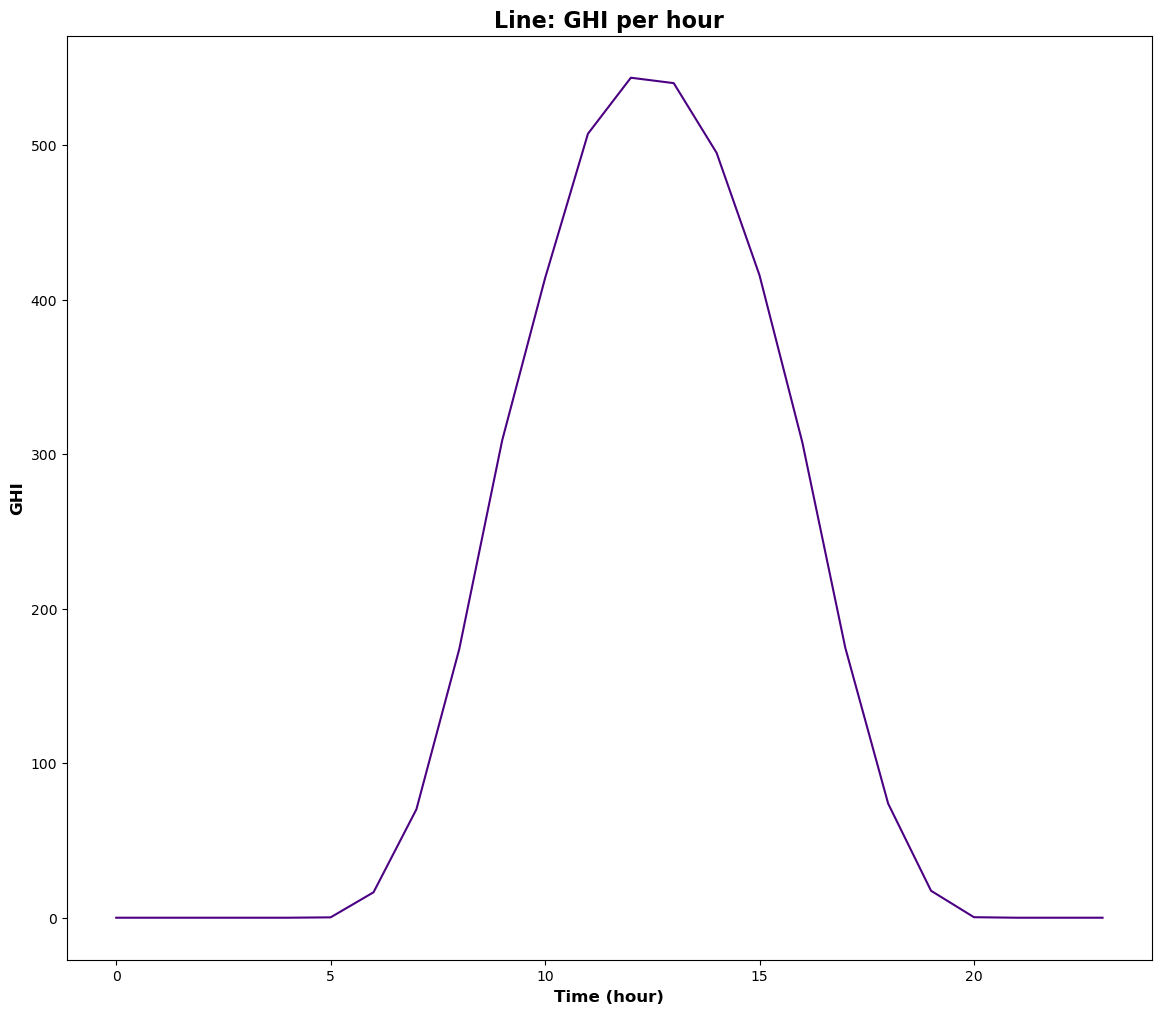

In [62]:
plt.figure(figsize=(14, 12))
plt.plot(df_analysis['analysis'], color='indigo')
plt.title('Line: GHI per hour', fontsize=16, fontweight='bold')
plt.xlabel('Time (hour)', fontsize=12, fontweight='bold')
plt.ylabel('GHI', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> GHI - ETR </span>

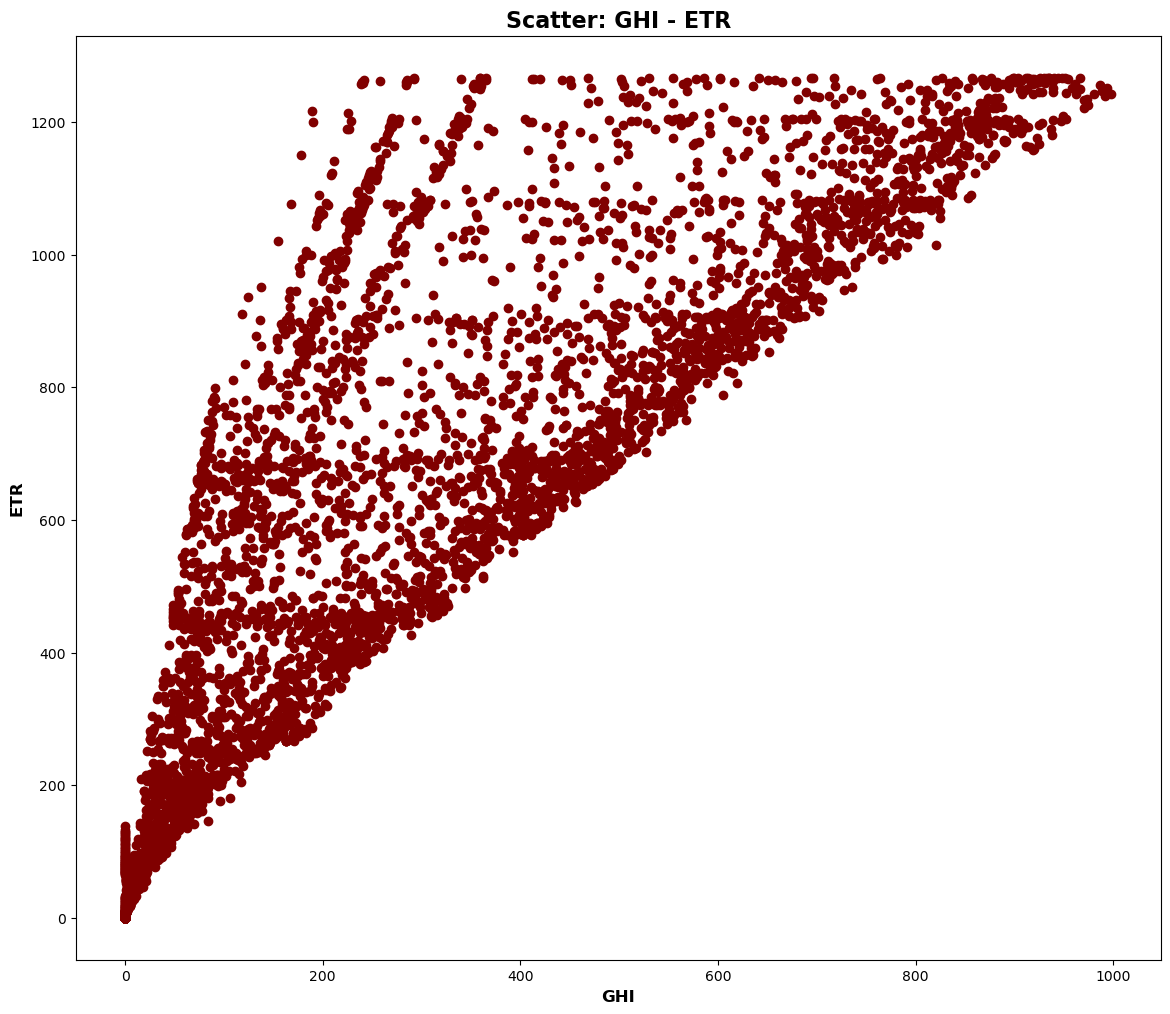

In [63]:
plt.figure(figsize=(14, 12))
plt.scatter(df_ghi['ghi'], df_ghi['etr'], color='maroon')
plt.title('Scatter: GHI - ETR', fontsize=16, fontweight='bold')
plt.xlabel('GHI', fontsize=12, fontweight='bold')
plt.ylabel('ETR', fontsize=12, fontweight='bold')
plt.show()


In [64]:
df_heatmap = df_ghi[['ghi', 'etr']].copy()
df_heatmap.head(15)


ghi  etr
0     0    0
1     0    0
2     0    0
3     0    0
4     0    0
5     0    0
6     0    0
7     8   54
8   171  266
9   228  454
10  417  589
11  467  660
12  475  664
13  223  598
14  307  469

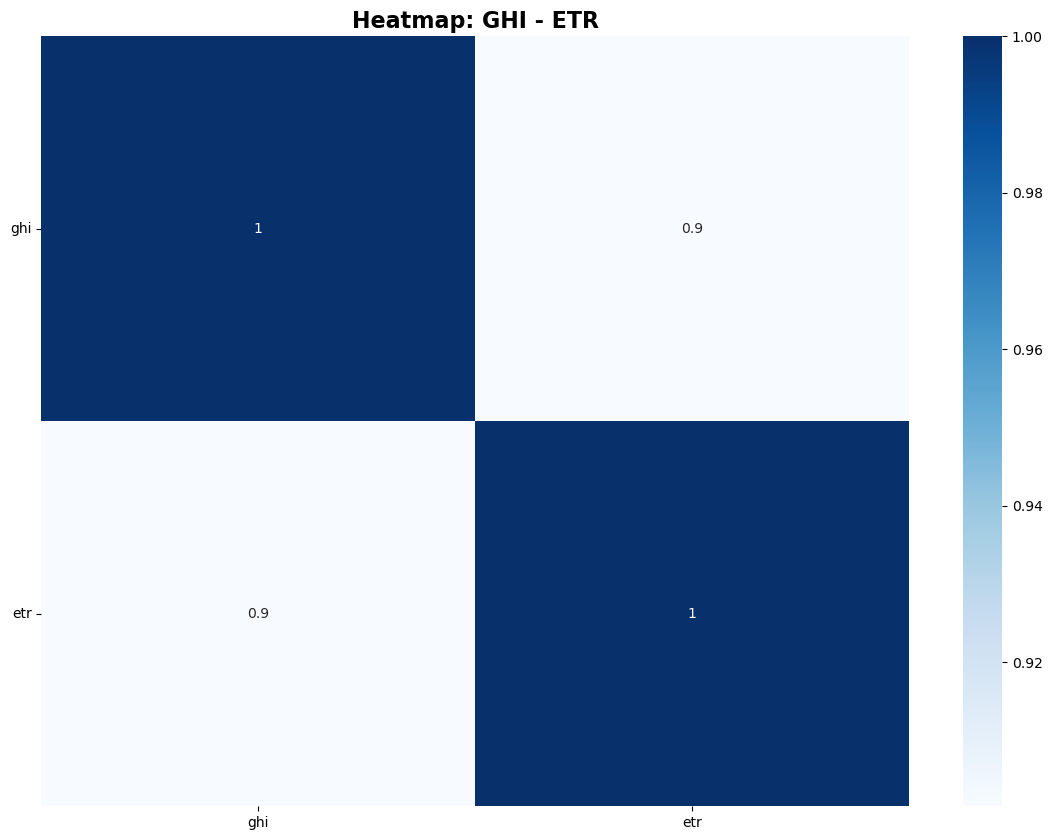

In [65]:
plt.figure(figsize=(14, 10))
title = "Heatmap: GHI - ETR"
data_plot = sns.heatmap(df_heatmap.corr(), cmap="Blues", annot=True)

plt.title(title, fontsize=16, fontweight='bold')
plt.yticks(rotation='horizontal')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Extraterrestrial radiation by GHI </span>

In [66]:
analysis = df_ghi.groupby('ghi')['etr'].count().sort_values()
df_analysis = analysis.to_frame()
df_analysis = df_analysis.sort_values(by=['ghi'], ascending=True)
df_analysis['ghi_etr'] = df_analysis
df_analysis['ghi_etr'].head(10)


ghi
0    3935
1      61
2      59
3      43
4      26
5      27
6      20
7      16
8      22
9      15
Name: ghi_etr, dtype: int64

In [67]:
df_ghi['ghi'].describe()

count    8473.000000
mean      174.840906
std       251.276445
min         0.000000
25%         0.000000
50%        11.000000
75%       290.000000
max       998.000000
Name: ghi, dtype: float64

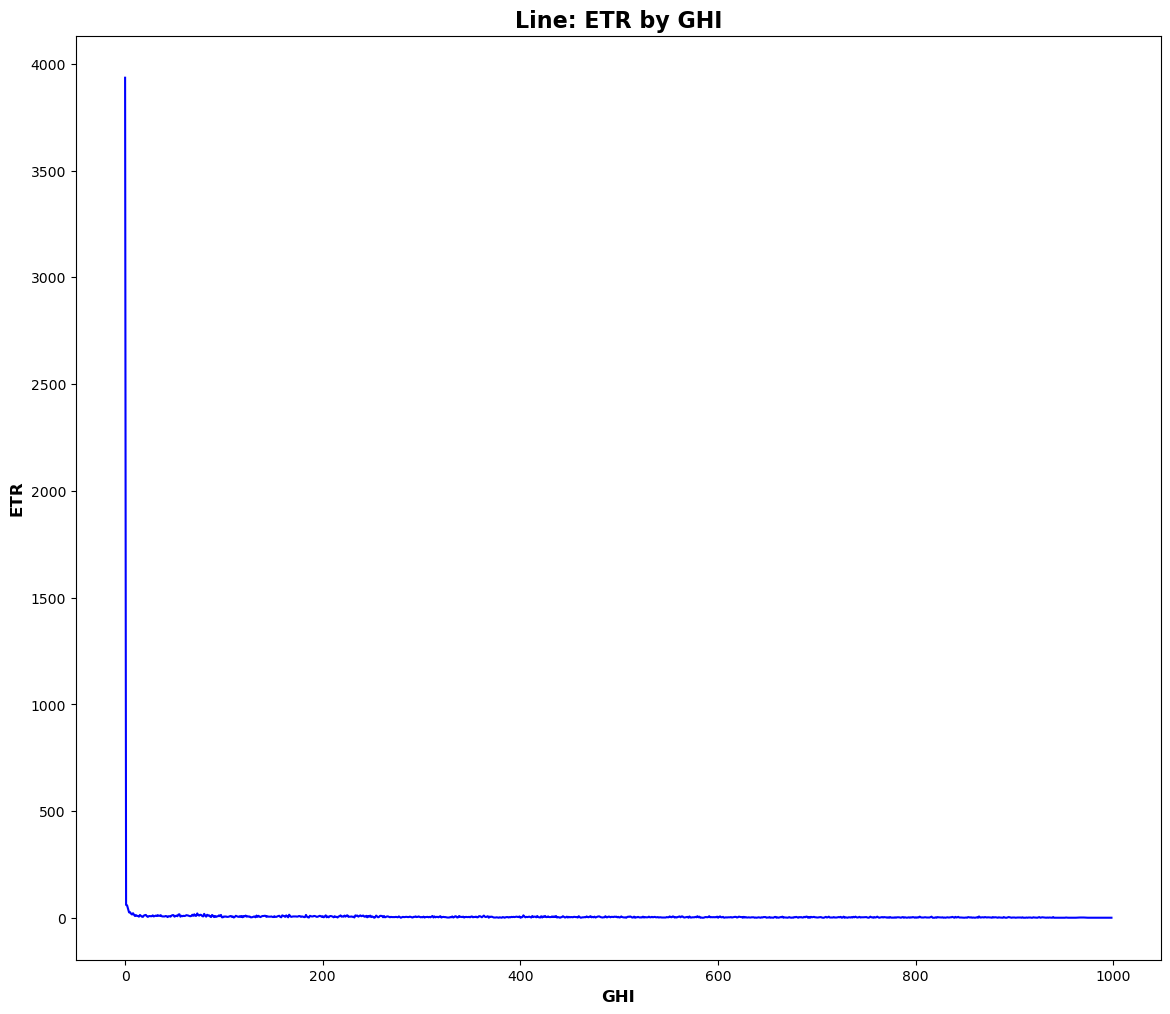

In [68]:
plt.figure(figsize=(14, 12))
plt.plot(df_analysis['ghi_etr'], color='blue')
plt.title('Line: ETR by GHI', fontsize=16, fontweight='bold')
plt.xlabel('GHI', fontsize=12, fontweight='bold')
plt.ylabel('ETR', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> GHI - Air Pressure </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Mean GHI for each Reading of Air Pressure </span>

In [69]:
df_heatmap = df_ghi[['ghi', 'pressure']].copy()
df_heatmap.head(15)


ghi  pressure
0     0       989
1     0       989
2     0       990
3     0       990
4     0       991
5     0       991
6     0       992
7     8       993
8   171       994
9   228       995
10  417       995
11  467       995
12  475       995
13  223       995
14  307       994

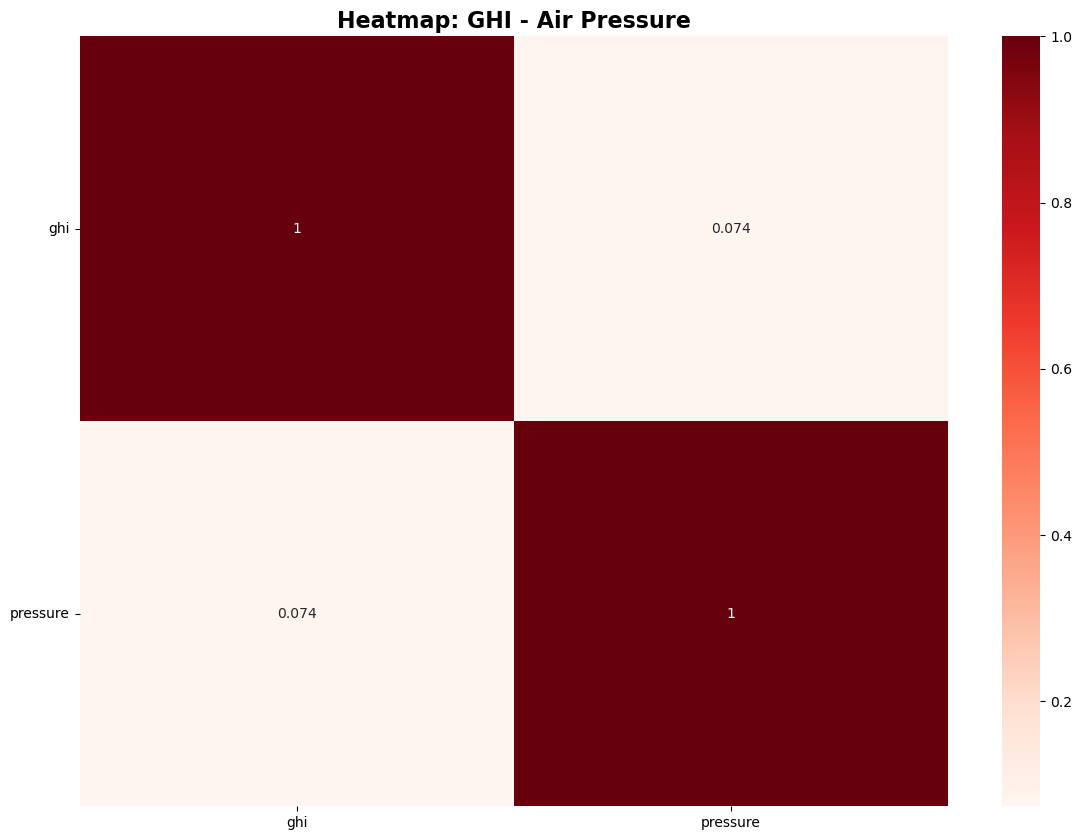

In [70]:
plt.figure(figsize=(14, 10))
title = "Heatmap: GHI - Air Pressure"
data_plot = sns.heatmap(df_heatmap.corr(), cmap="Reds", annot=True)

plt.title(title, fontsize=16, fontweight='bold')
plt.yticks(rotation='horizontal')
plt.show()

In [71]:
analysis = df_ghi.groupby('pressure')['ghi'].mean().sort_values()
df_analysis = analysis.to_frame()
df_analysis = df_analysis.sort_values(by=['pressure'], ascending=True)
df_analysis['pressure_ghi'] = df_analysis
df_analysis['pressure_ghi'].head(15)


pressure
976    672.000000
977    868.000000
978    355.500000
979    138.833333
980    391.500000
981    163.800000
982    183.555556
983    124.041667
984     42.464286
985    126.000000
986     45.479167
987     50.909091
988     68.661972
989     70.155340
990     94.597015
Name: pressure_ghi, dtype: float64

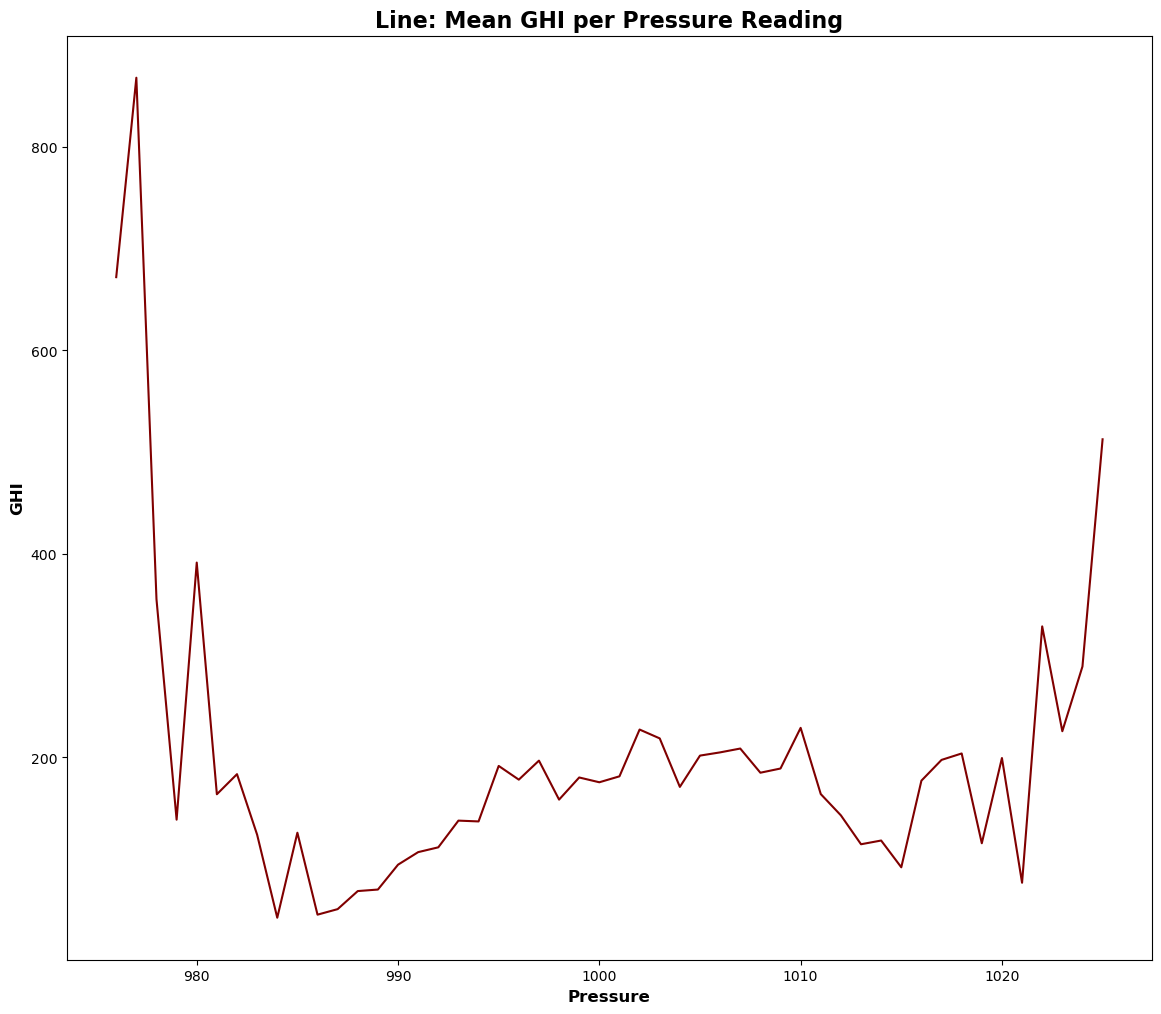

In [72]:
plt.figure(figsize=(14, 12))
plt.plot(df_analysis['pressure_ghi'], color='maroon')
plt.title('Line: Mean GHI per Pressure Reading', fontsize=16, fontweight='bold')
plt.xlabel('Pressure', fontsize=12, fontweight='bold')
plt.ylabel('GHI', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 2.3 Multivariate Inspection </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Pair Plot </span>

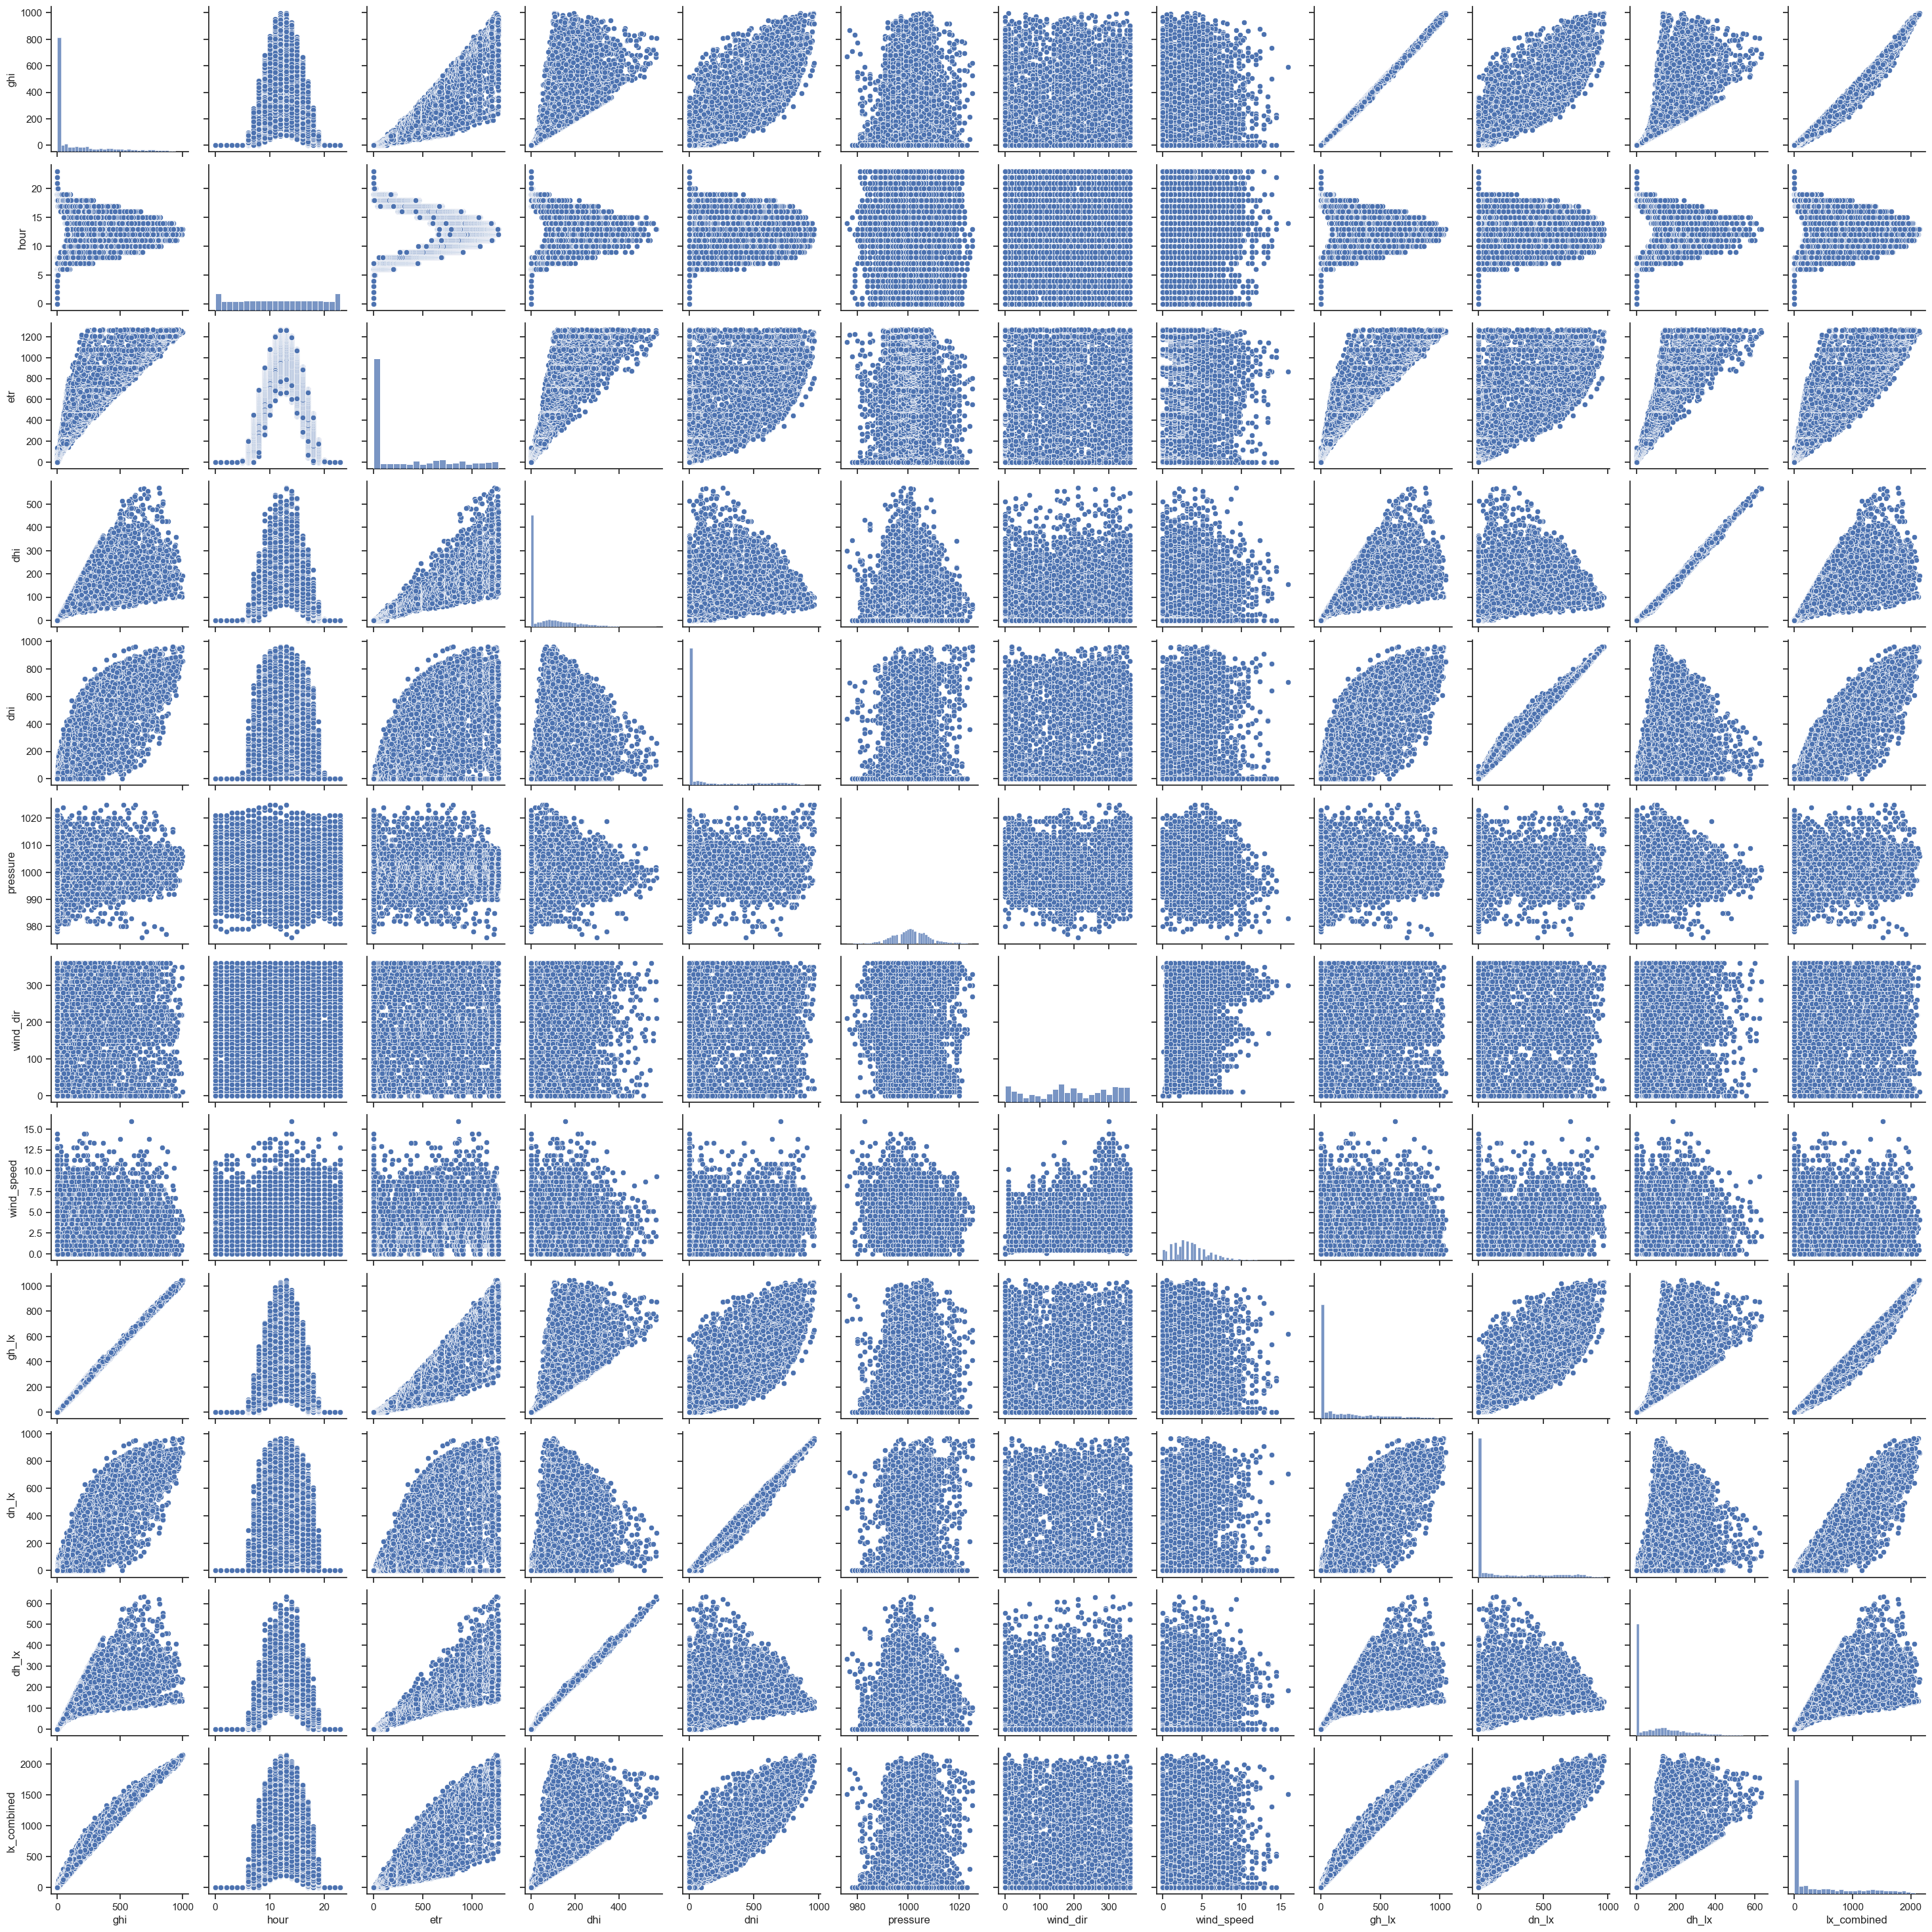

In [73]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_ghi)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Pearson Correlation Matrix </span>

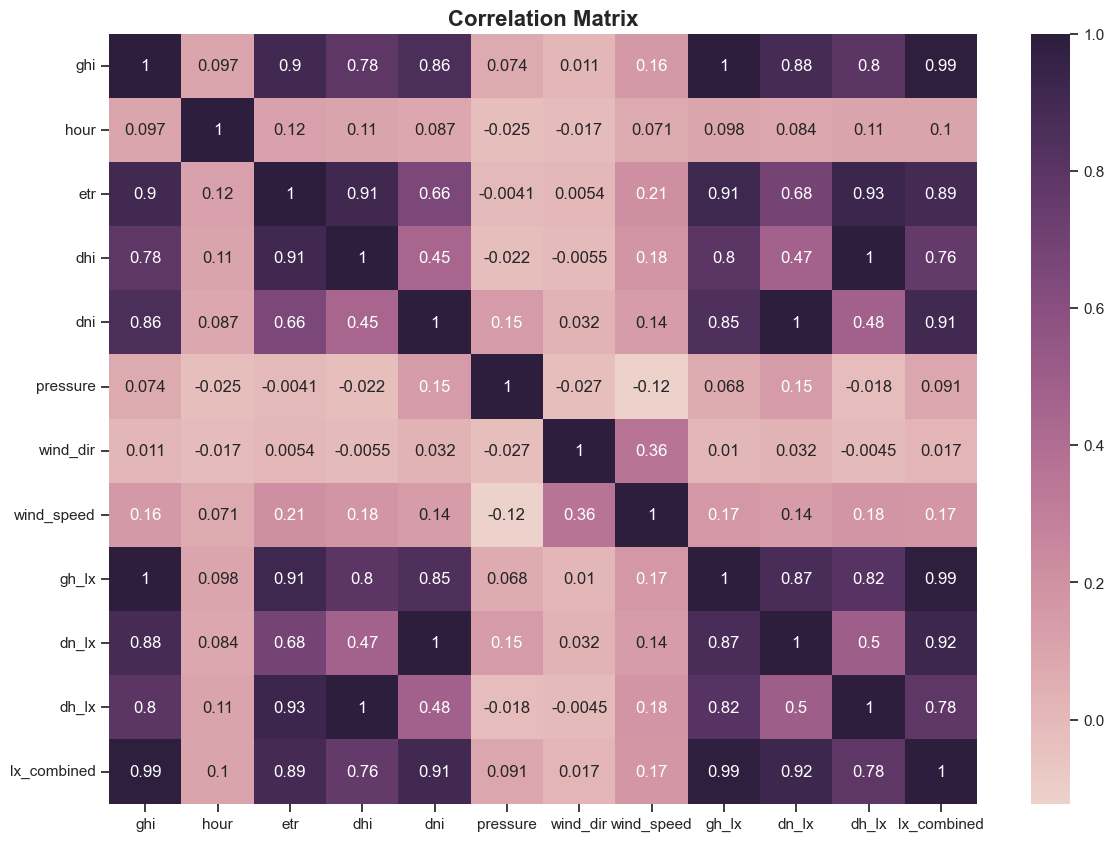

In [74]:
plt.figure(figsize=(14, 10))
title = "Correlation Matrix"
corr_matrix = df_ghi.corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Distribution Graph </span>

In [75]:
bins = 15
d1 = df_ghi['ghi']
d2 = df_ghi['etr']
d3 = df_ghi['dhi']
d4 = df_ghi['dni']
d5 = df_ghi['pressure']
d6 = df_ghi['wind_dir']
d7 = df_ghi['wind_speed']
d8 = df_ghi['lx_combined']


Text(0.5, 1.0, 'Lx Combined')

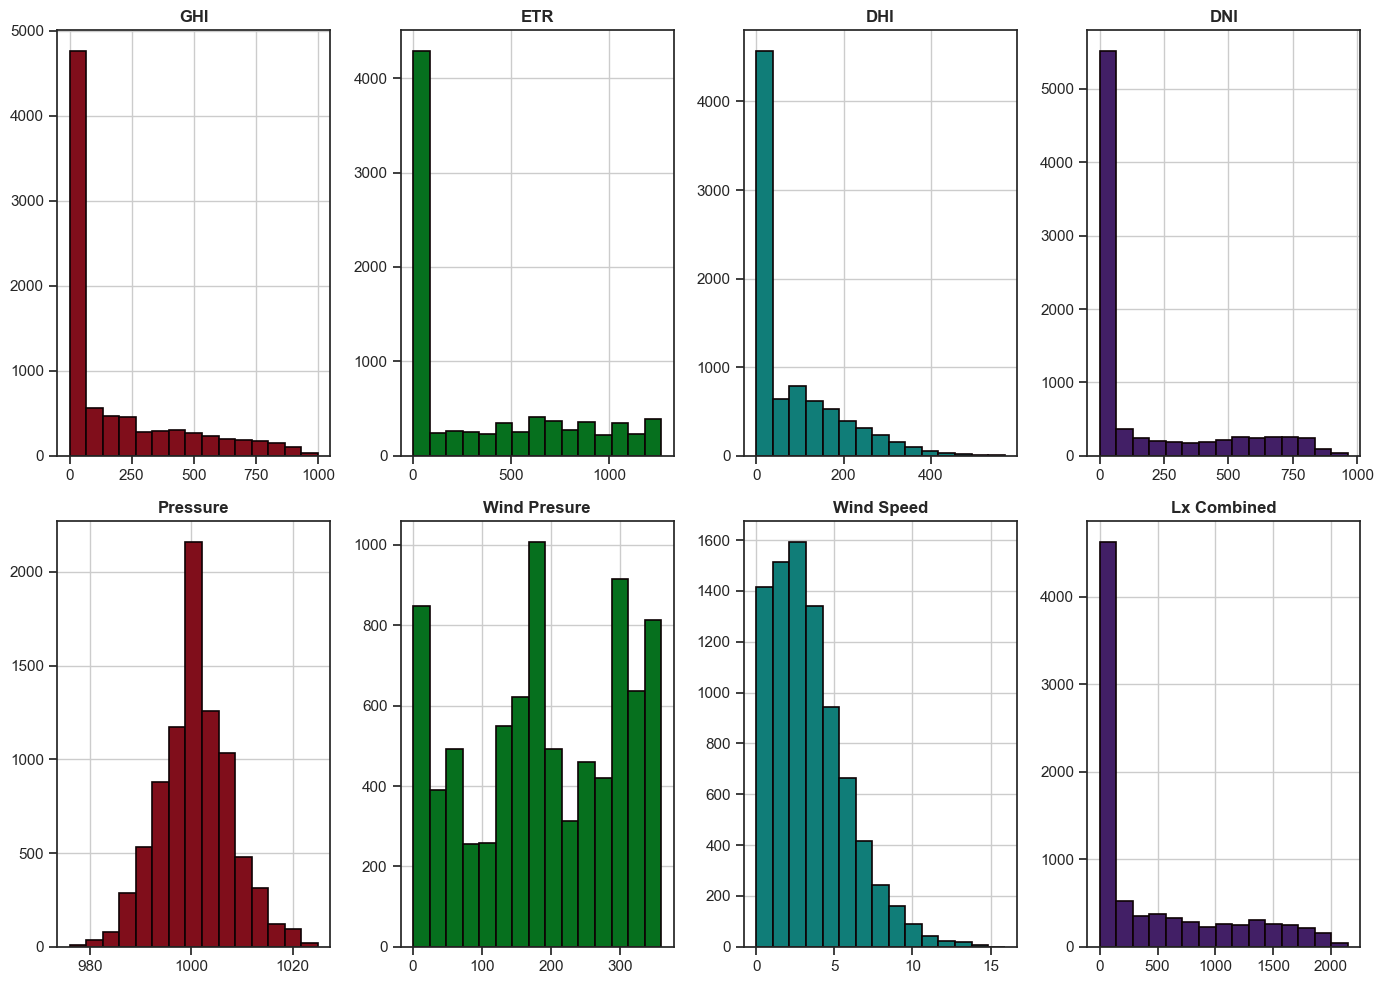

In [79]:
fig, axes = plt.subplots(2, 4)
plt.rcParams["figure.figsize"] = [14, 11]
plt.rcParams["figure.autolayout"] = True

d1.hist(bins=bins, color='#800e1b', ax=axes[0,0], edgecolor='#0d0103', linewidth=1.2)
d2.hist(bins=bins, color='#06701e', ax=axes[0,1], edgecolor='#0d0103', linewidth=1.2)
d3.hist(bins=bins, color='#107d78', ax=axes[0,2], edgecolor='#0d0103', linewidth=1.2)
d4.hist(bins=bins, color='#421f66', ax=axes[0,3], edgecolor='#0d0103', linewidth=1.2)

d5.hist(bins=bins, color='#800e1b', ax=axes[1,0], edgecolor='#0d0103', linewidth=1.2)
d6.hist(bins=bins, color='#06701e', ax=axes[1,1], edgecolor='#0d0103', linewidth=1.2)
d7.hist(bins=bins, color='#107d78', ax=axes[1,2], edgecolor='#0d0103', linewidth=1.2)
d8.hist(bins=bins, color='#421f66', ax=axes[1,3], edgecolor='#0d0103', linewidth=1.2)

axes[0,0].set_title('GHI', fontsize=12, fontweight='bold')
axes[0,1].set_title('ETR', fontsize=12, fontweight='bold')
axes[0,2].set_title('DHI', fontsize=12, fontweight='bold')
axes[0,3].set_title('DNI', fontsize=12, fontweight='bold')

axes[1,0].set_title('Pressure', fontsize=12, fontweight='bold')
axes[1,1].set_title('Wind Presure', fontsize=12, fontweight='bold')
axes[1,2].set_title('Wind Speed', fontsize=12, fontweight='bold')
axes[1,3].set_title('Lx Combined', fontsize=12, fontweight='bold')